<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Николай! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='purple'><b>Комментарий студента: Привет! поехали :) </b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>
<font color='purple'><b>Комментарий студента: Привет! во второй итерации я увидел 2 комментария: включить Scaler в KNN и убрать все выбросы. Это сделано!</b></font>

## Проект спринт 12
**Название проекта**:  
Цифра     
_____
**Описание исследования**:  
Построение модели предсказания коэффициента восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки.  
_____
**Цель исследования**:  
Оптимизация производства, чтобы не запускать предприятие с убыточными характеристиками.
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Анализ данных](#step2)  
[Шаг 3. Построение модели](#step3)  
[Шаг 4. Результаты и выводы](#step4)  
_____
**Исходные данные.**
Исходные файлы, содержащие данные геологоразведки трёх регионов:  
- [gold_recovery_full_new.csv](gold_recovery_full_new.csv) - полные исходные данные
- [gold_recovery_test_new.csv](gold_recovery_test_new.csv) - валидационная выборка
- [gold_recovery_train_new.csv](gold_recovery_train_new.csv) - обучающая выборка   


<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [1]:
# загружаем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as mae

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 54321
CROSS_VALS = 3

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>  
<font color='purple'><b>Комментарий студента: немного причесал</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Откроем файлы и изучим их

In [2]:
def load_file(file_name):
    try:
        df = pd.read_csv(file_name)
        print('Загрузили файл локально')
    except:
        file_path = 'https://code.s3.yandex.net/datasets/' + file_name
        print('локально не удалось, загружаем из интернета')
        df = pd.read_csv(file_path)
    return df

In [3]:
full = load_file('gold_recovery_full_new.csv')
test = load_file('gold_recovery_test_new.csv')
train = load_file('gold_recovery_train_new.csv')
print(full.shape)
print(train.shape)
print(test.shape)

Загрузили файл локально
Загрузили файл локально
Загрузили файл локально
(19439, 87)
(14149, 87)
(5290, 53)


в тестовом датасете меньше фичей, чем в полной и обучающих выборках

In [4]:
display(train.sample(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1554,2016-03-26 11:00:00,5.535789,9.682752,3.538635,45.953321,66.050901,10.417790,1.265133,17.626674,2.682856,...,11.933003,-508.075713,11.965206,-506.258055,11.996111,-500.607134,9.966706,-500.311778,20.004644,-500.178813
2846,2016-06-07 12:59:59,3.638947,9.553307,7.382438,47.523308,46.792518,7.458328,2.335230,10.988322,3.586105,...,8.973844,-550.370720,7.089005,-539.017577,8.075322,-550.395231,5.966159,-550.312332,18.034004,-500.082787


In [5]:
print(train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Проверим, что эффективность обогащения рассчитана правильно

In [6]:
# C (F - T)
# F (C - T)
# C - Au after
# F - Au before
# T - Au in tails
train['rougher.output.recovery_calc'] =\
        100.0 * train['rougher.output.concentrate_au'] * \
        (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])\
        / (train['rougher.input.feed_au'] *\
        (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))
m = mae(train['rougher.output.recovery'], train['rougher.output.recovery_calc'])
print(m)

1.1498046842860452e-14


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Старайся разбивать код на строчки так, что бы всё было перед глазами. По стандарту строка кода не должна превышать 79 символов.</font>  
<font color='purple'><b>Комментарий студента: привел к PEP8</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

на ~~тестовой~~обучающей выборке разница MAE между рассчитанным уровнем обогащения и из данных ничтожно мал, можно рассчитывать на исходные данные

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Это обучающая выборка.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Проанализируем признаки, недоступные в тестовой выборке

In [7]:
test_columns = set(test.columns)
train_columns = set(train.columns)
diff = list(sorted(train_columns - test_columns))
diff

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

In [8]:
display(train[diff].info())
display(train[diff].sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_au                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.recovery,rougher.output.recovery_calc,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
3570,5.658524,42.864384,10.732220,15.026662,64.450569,7.979593,2.631713,2.033022,10.738507,7.943147,...,73.480041,73.480041,6.384144,2.312100,0.743951,18.658325,11.908302,4.171391,3.820439,5.730463
3020,4.784508,43.752531,10.838779,8.344338,76.631348,7.380542,1.855471,1.301005,10.582533,8.154454,...,83.701416,83.701416,5.342380,1.669694,0.524071,16.127561,9.904417,2.936454,2.723840,10.303716
9483,4.149324,47.934460,9.708866,9.363455,66.912645,7.344286,2.214877,2.495555,12.634644,9.111190,...,89.374844,89.374844,4.107973,0.915155,0.556887,19.911415,18.004111,3.251158,5.356903,5.331961
1986,7.942528,40.059931,10.862516,10.652383,62.108107,11.886675,4.299276,1.953145,7.962863,10.989997,...,75.305928,75.305928,7.481482,3.409127,0.835332,12.205274,18.602632,4.497620,3.918338,8.959296
12093,4.661698,47.806731,9.103560,7.007652,66.473873,8.048031,1.917059,1.690523,10.072134,8.062344,...,85.614372,85.614372,3.465636,1.038436,0.544380,21.508950,17.819739,4.101498,8.731664,0.765574
2045,3.992968,46.872986,10.529990,10.021277,67.192257,7.610169,2.902114,2.103922,13.256887,6.618287,...,80.480989,80.480989,5.763063,2.145888,0.898812,17.685269,13.613934,2.234420,4.578559,10.089981
9391,4.261643,44.655690,12.507512,6.406637,63.842121,7.189668,2.450490,3.299619,10.390844,7.147366,...,83.692231,83.692231,4.948317,1.371749,0.588737,16.006931,16.283583,3.260087,8.214286,2.747465
12483,5.777655,42.727106,9.789753,6.628171,50.530755,7.948159,3.575872,1.947533,9.573228,4.940719,...,68.776189,68.776189,6.039711,2.788340,1.047366,18.807353,16.605439,7.595691,8.508208,NaN
8127,5.012851,43.945417,11.100090,8.160905,67.279245,8.420568,2.779728,3.042024,8.861045,7.909917,...,82.331947,82.331947,5.668550,1.880990,0.523675,13.023956,16.192121,4.825040,7.853225,2.320415
7185,5.022626,42.528770,12.404406,11.847052,62.607427,8.598046,3.396033,3.362259,12.492703,8.627850,...,81.701712,81.701712,6.180911,2.253261,1.085247,17.753394,11.553730,5.251294,3.845992,12.810769


в тестовой выборке отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть)  
также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

### проведем предобработку данных

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Данные для моделей можно подготовить позже, у нас впереди ещё анализ данных.</font>  
<font color='purple'><b>Комментарий студента: ~~сделал здесь, чтобы уже не мешались лишние~~ все-таки перенес после очистки от выбросов</b></font>

In [9]:
train['date'] = pd.to_datetime(train.date, format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test.date, format='%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full.date, format='%Y-%m-%d %H:%M:%S')

In [10]:
#train.dropna(inplace=True)
train.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Теряем данные.\
В условиях есть указание, что соседние данные похожи. Можно протестировать работу моделей с заполнением по этому условию.</font>  
<font color='purple'><b>Комментарий студента: поправлено (аналогично тестовой выборке)</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

### построим распределения переменных в обучающих и тестовых выборках на одних графиках

date


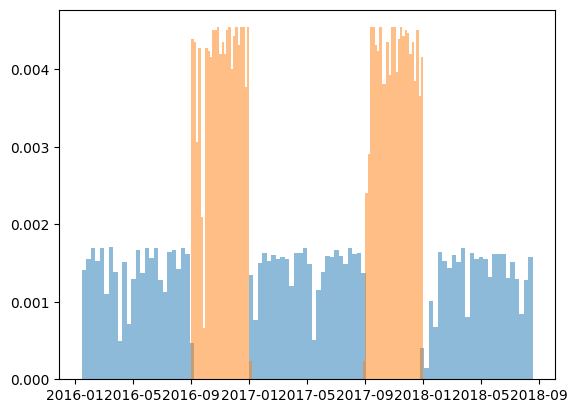

final.output.concentrate_ag


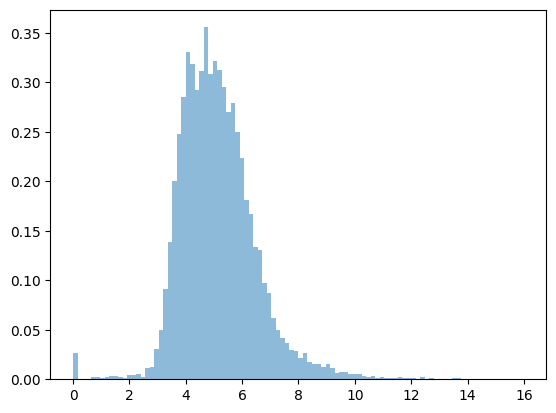

final.output.concentrate_pb


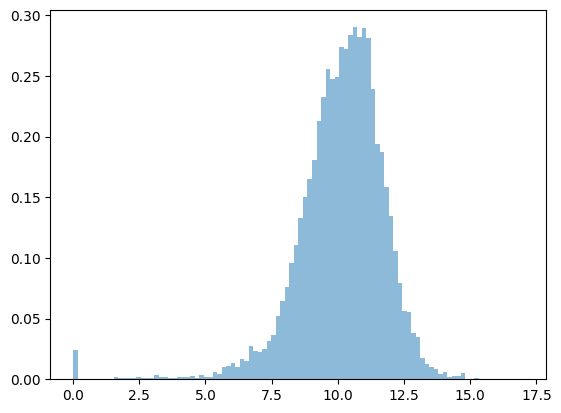

final.output.concentrate_sol


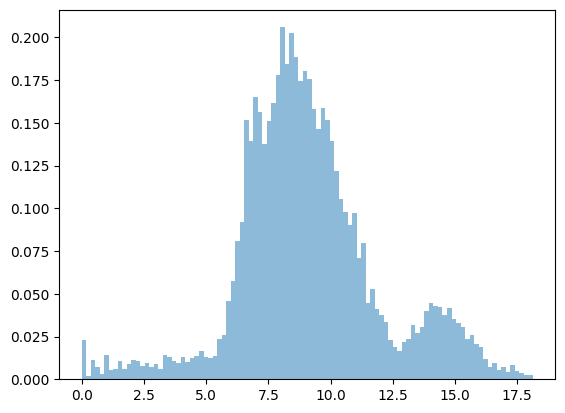

final.output.concentrate_au


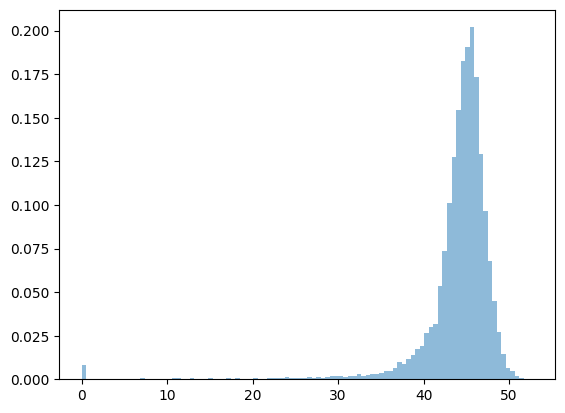

final.output.recovery


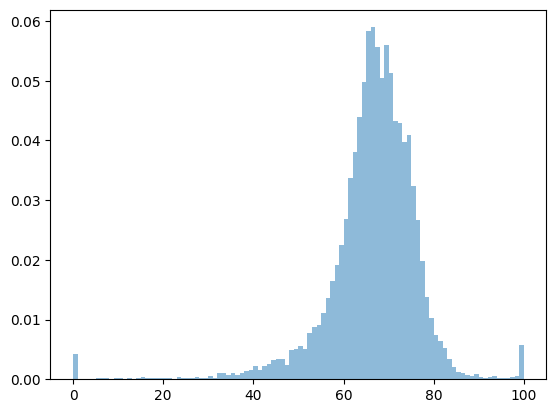

final.output.tail_ag


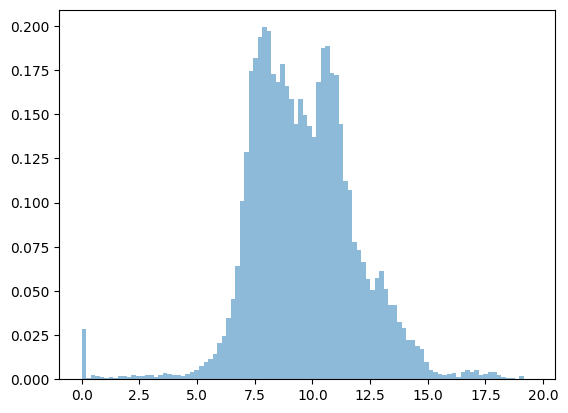

final.output.tail_pb


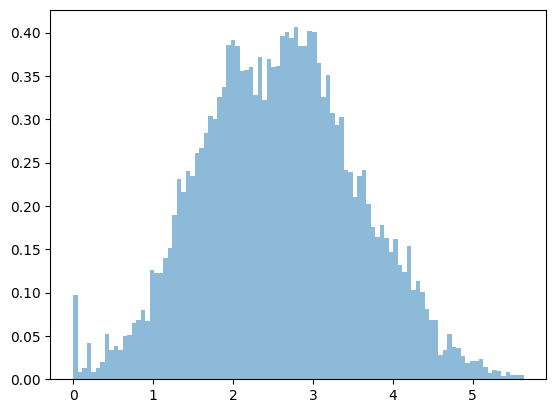

final.output.tail_sol


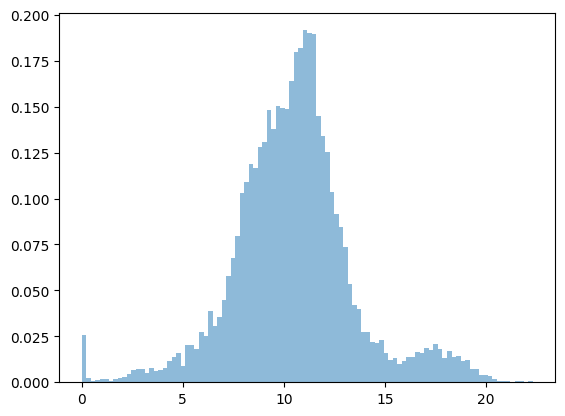

final.output.tail_au


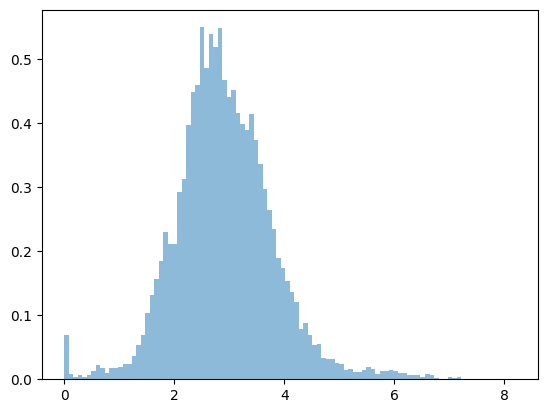

primary_cleaner.input.sulfate


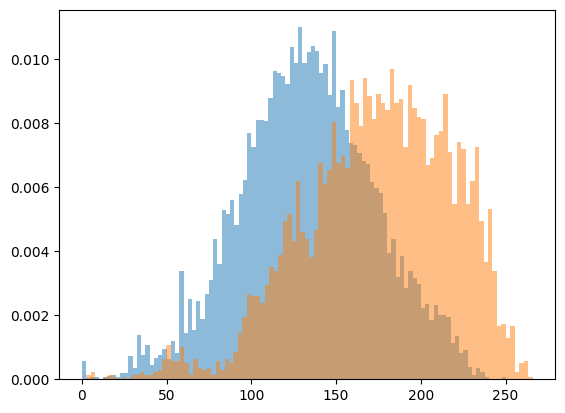

primary_cleaner.input.depressant


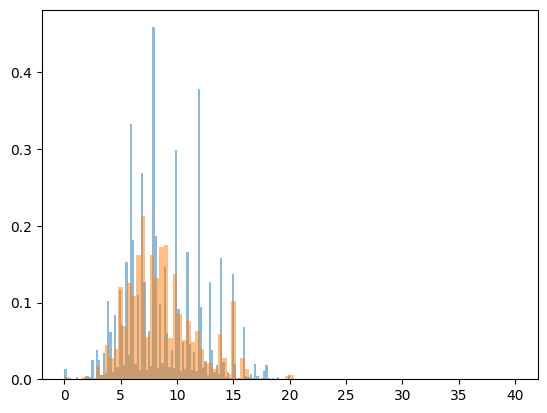

primary_cleaner.input.feed_size


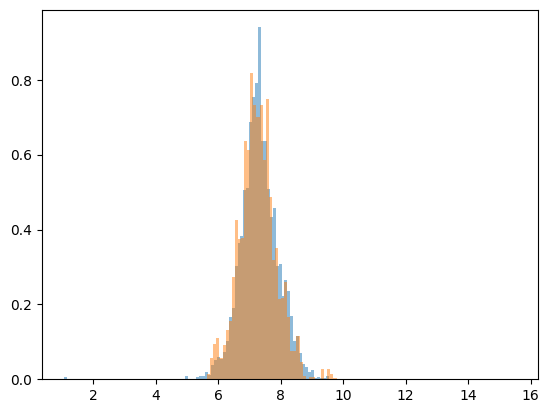

primary_cleaner.input.xanthate


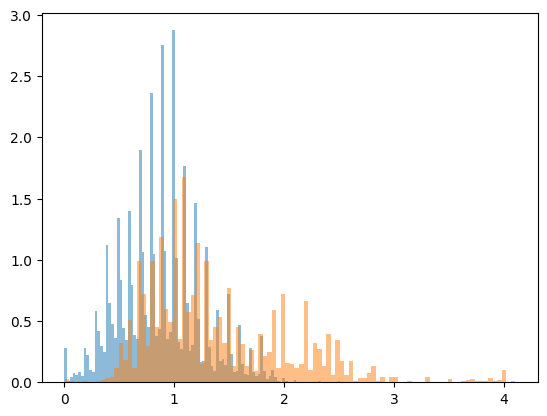

primary_cleaner.output.concentrate_ag


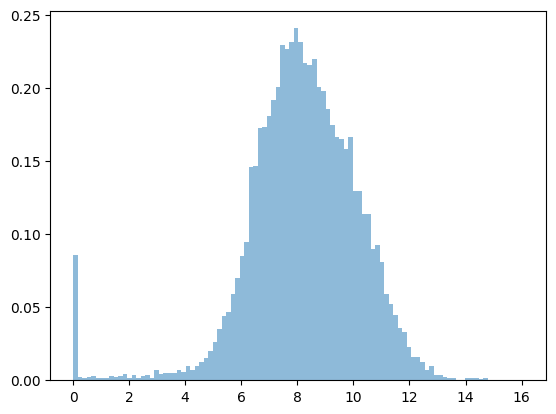

primary_cleaner.output.concentrate_pb


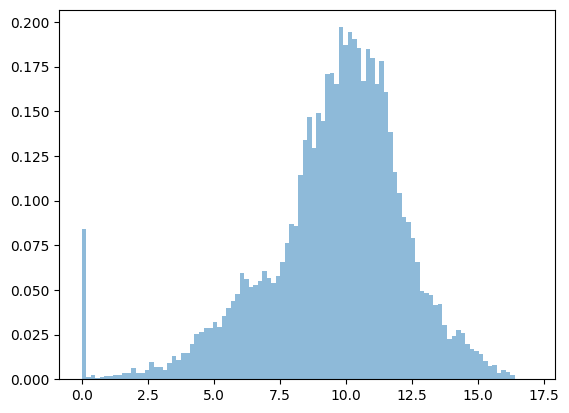

primary_cleaner.output.concentrate_sol


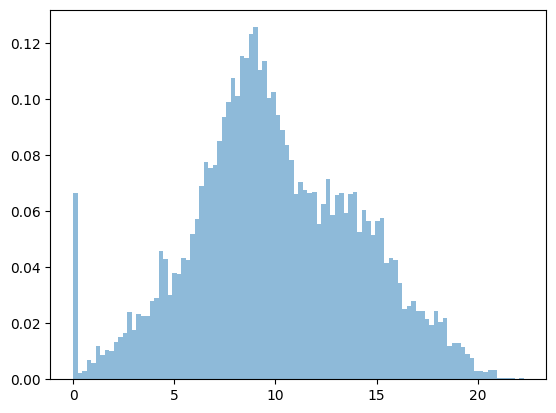

primary_cleaner.output.concentrate_au


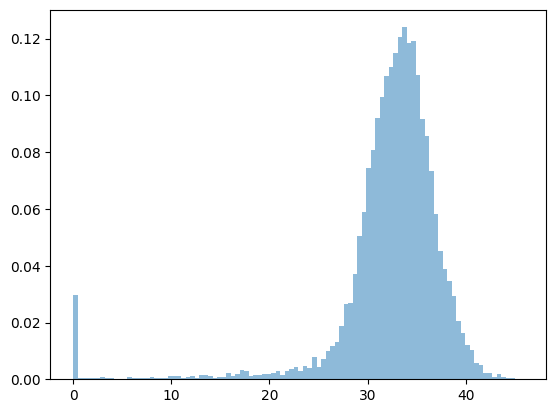

primary_cleaner.output.tail_ag


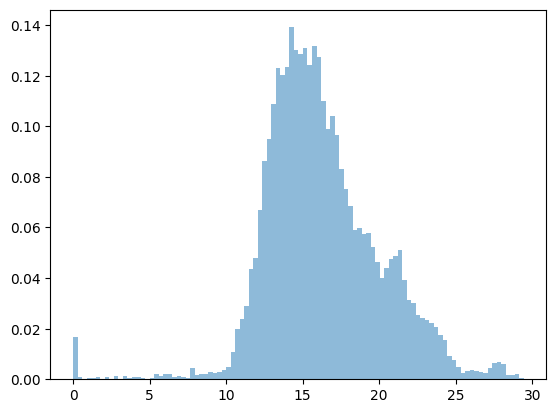

primary_cleaner.output.tail_pb


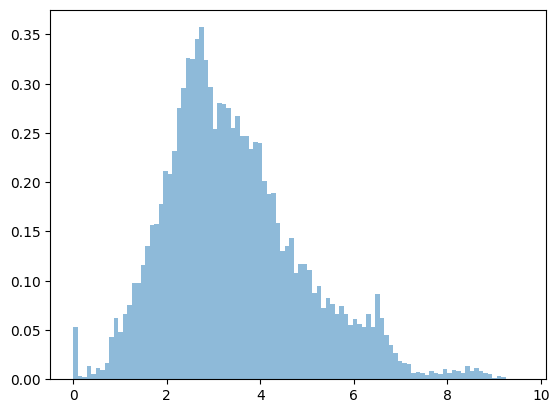

primary_cleaner.output.tail_sol


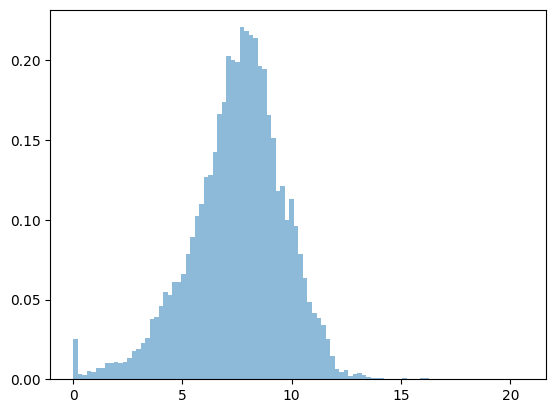

primary_cleaner.output.tail_au


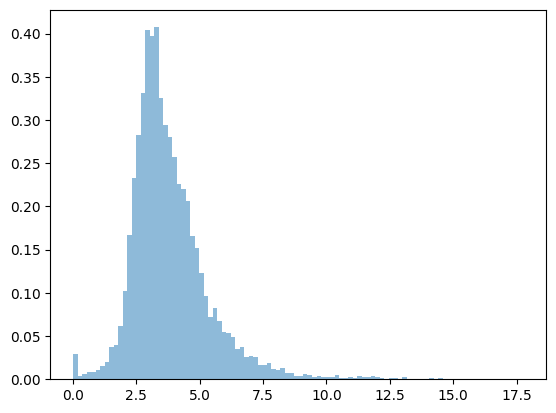

primary_cleaner.state.floatbank8_a_air


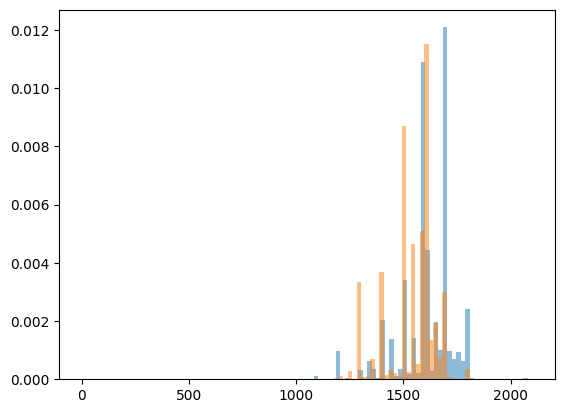

primary_cleaner.state.floatbank8_a_level


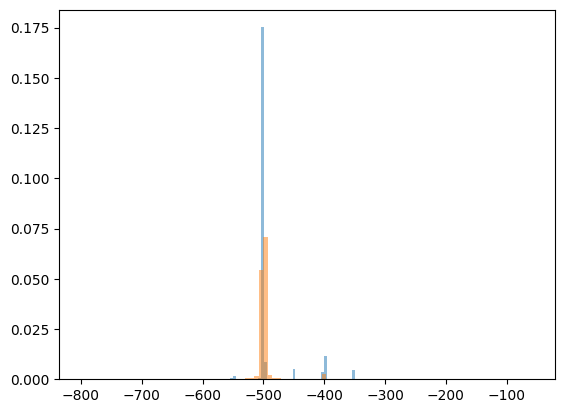

primary_cleaner.state.floatbank8_b_air


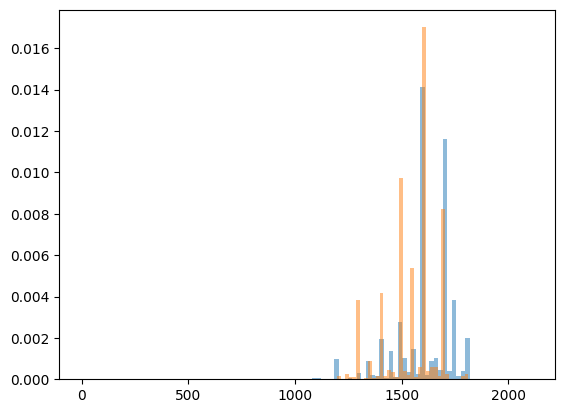

primary_cleaner.state.floatbank8_b_level


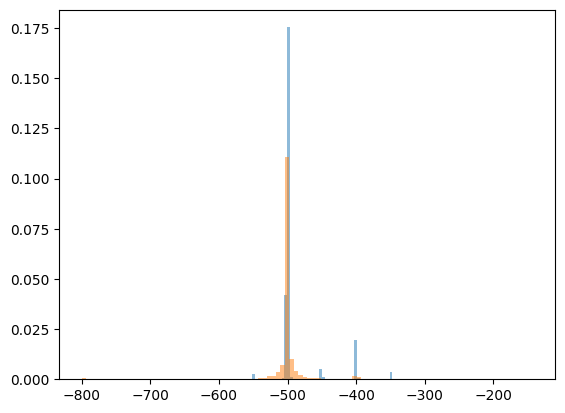

primary_cleaner.state.floatbank8_c_air


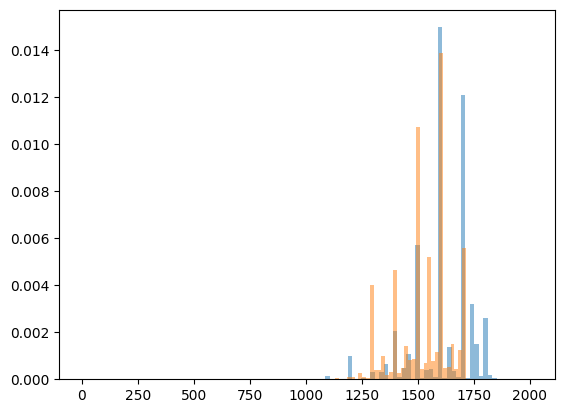

primary_cleaner.state.floatbank8_c_level


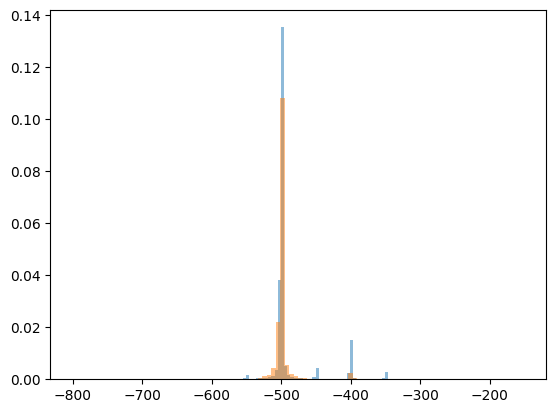

primary_cleaner.state.floatbank8_d_air


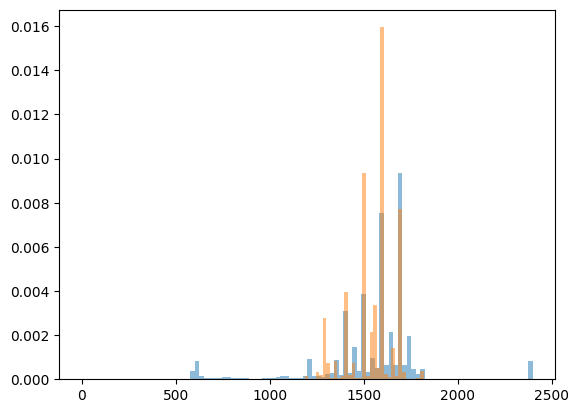

primary_cleaner.state.floatbank8_d_level


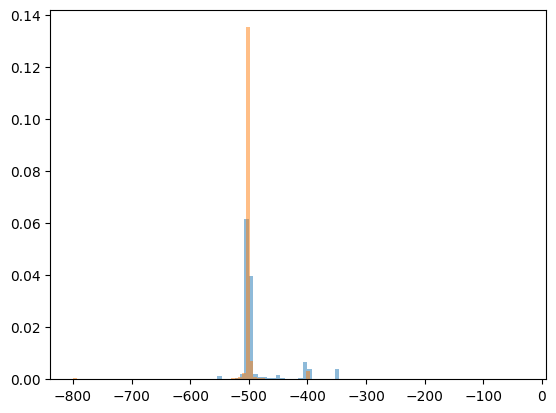

rougher.calculation.sulfate_to_au_concentrate


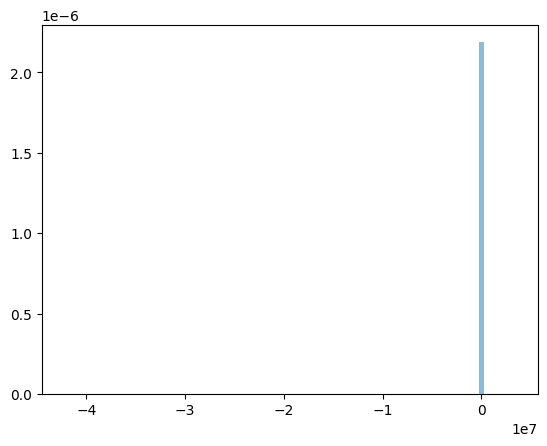

rougher.calculation.floatbank10_sulfate_to_au_feed


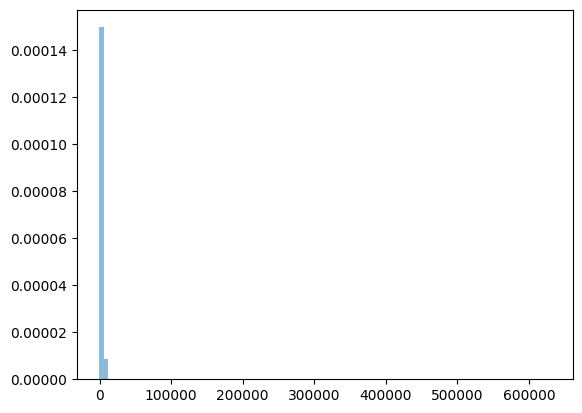

rougher.calculation.floatbank11_sulfate_to_au_feed


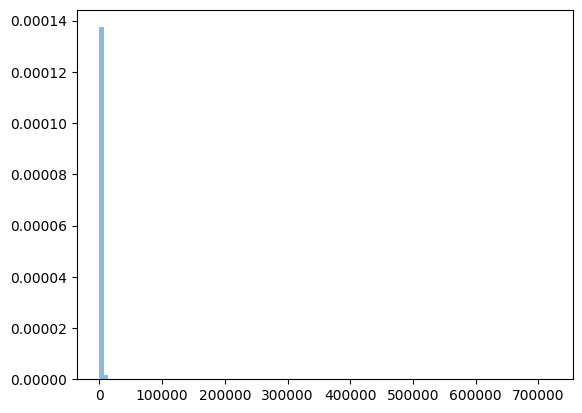

rougher.calculation.au_pb_ratio


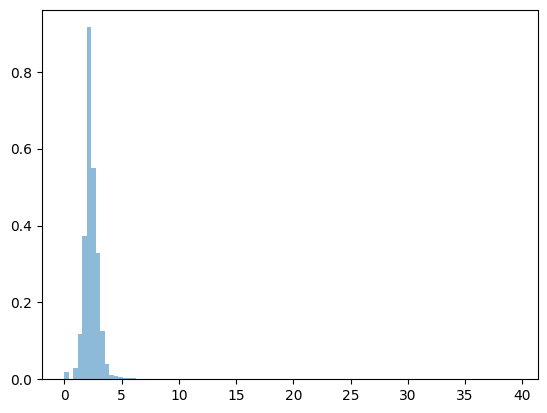

rougher.input.feed_ag


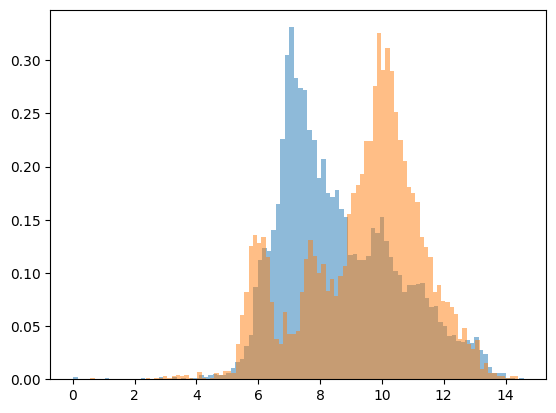

rougher.input.feed_pb


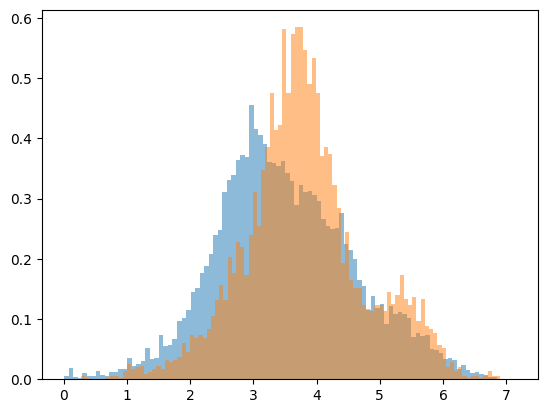

rougher.input.feed_rate


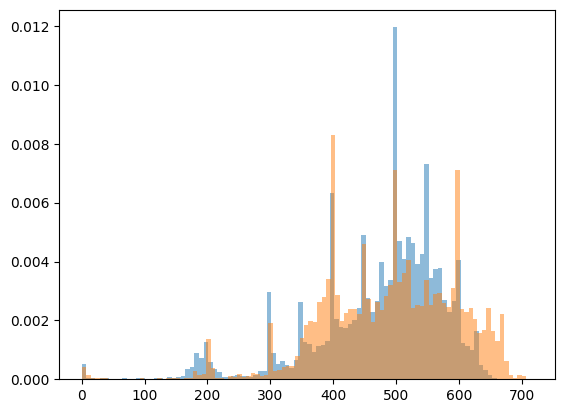

rougher.input.feed_size


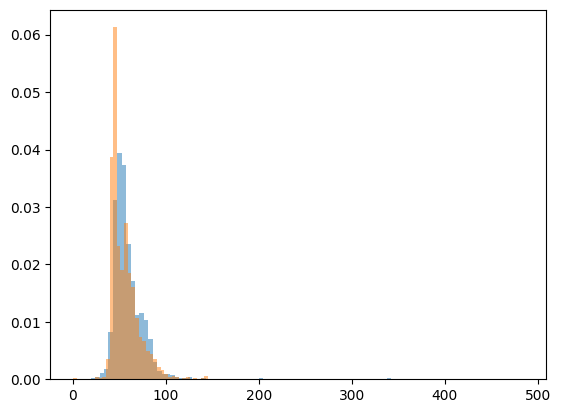

rougher.input.feed_sol


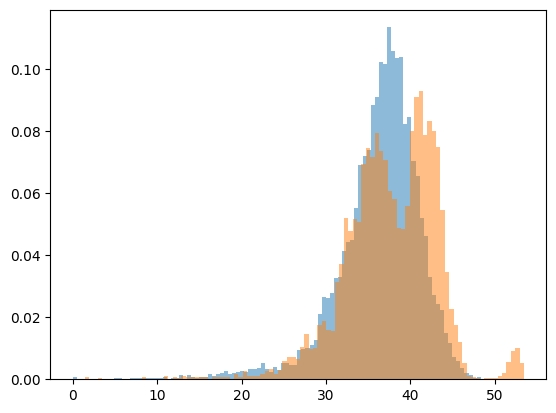

rougher.input.feed_au


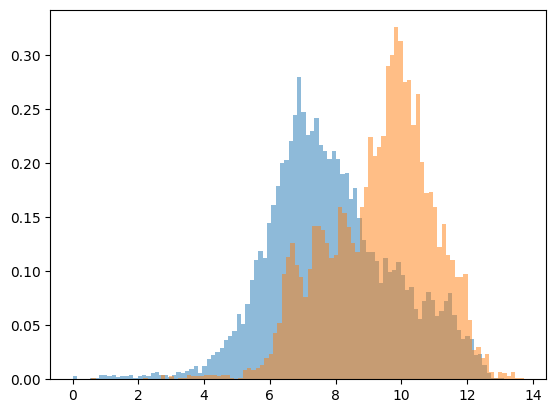

rougher.input.floatbank10_sulfate


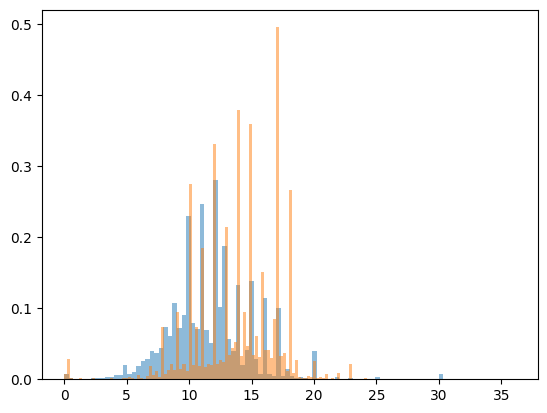

rougher.input.floatbank10_xanthate


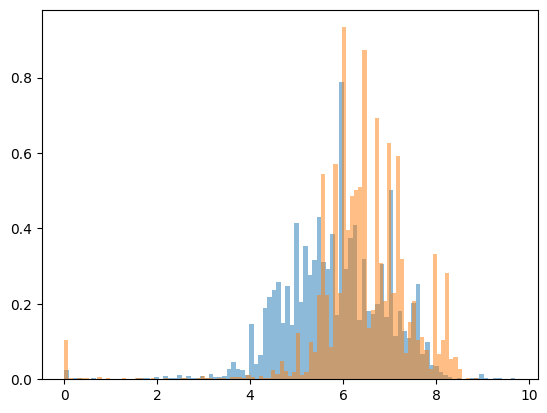

rougher.input.floatbank11_sulfate


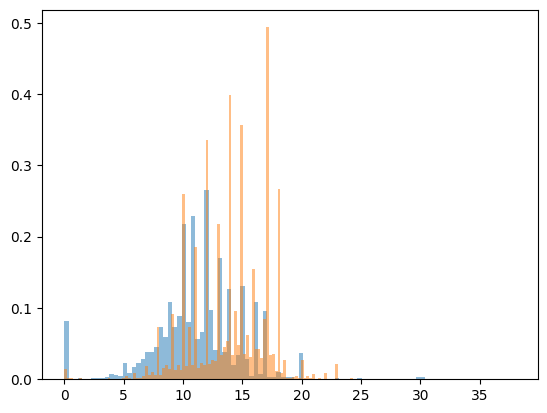

rougher.input.floatbank11_xanthate


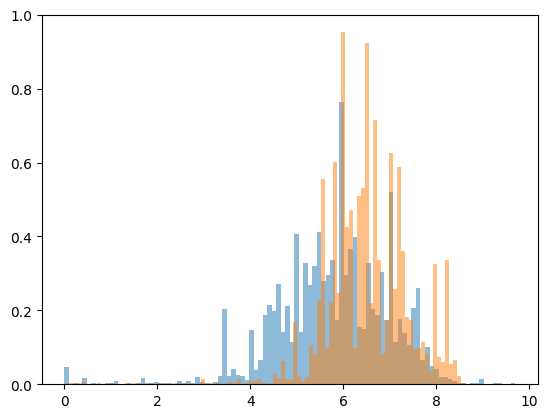

rougher.output.concentrate_ag


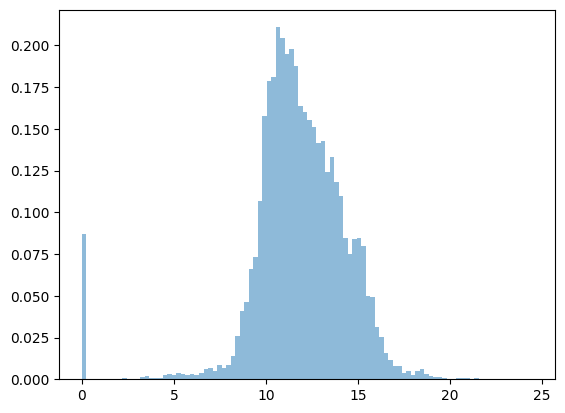

rougher.output.concentrate_pb


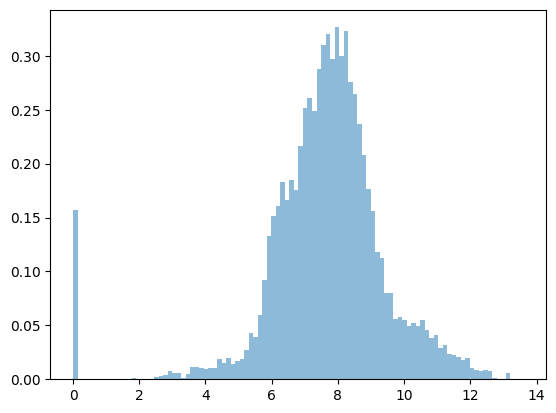

rougher.output.concentrate_sol


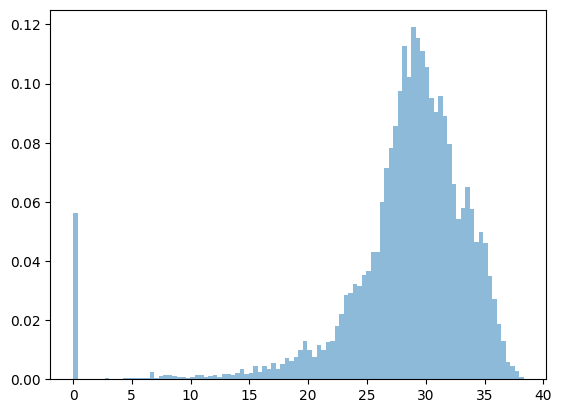

rougher.output.concentrate_au


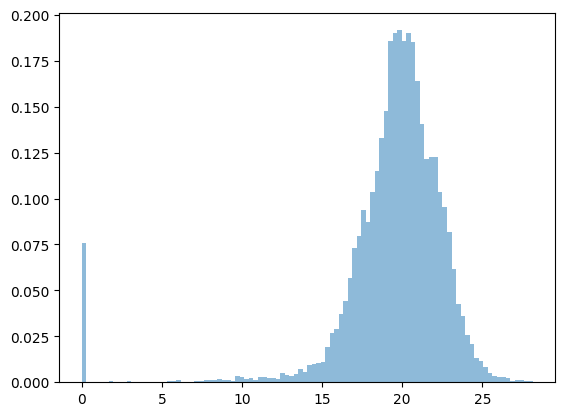

rougher.output.recovery


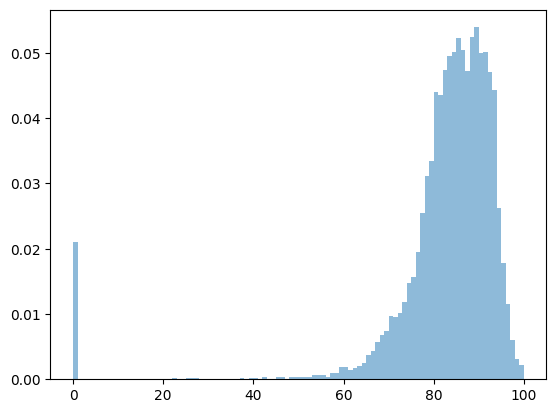

rougher.output.tail_ag


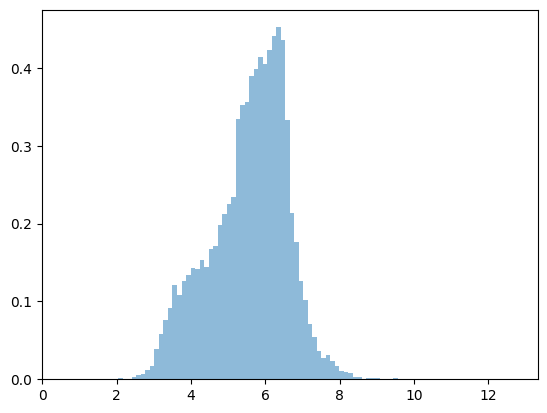

rougher.output.tail_pb


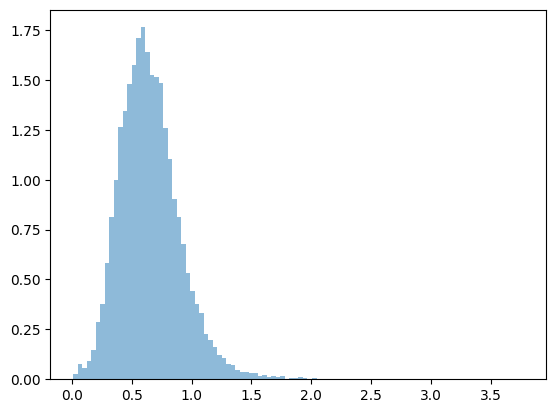

rougher.output.tail_sol


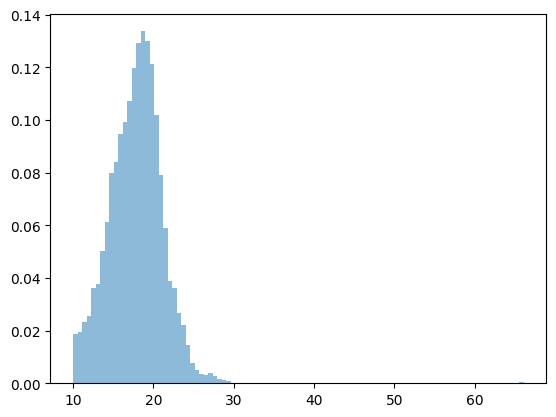

rougher.output.tail_au


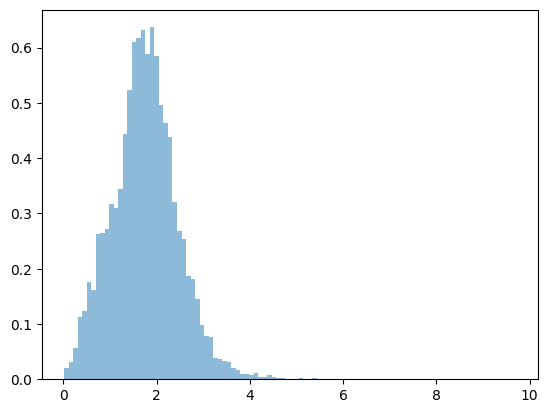

rougher.state.floatbank10_a_air


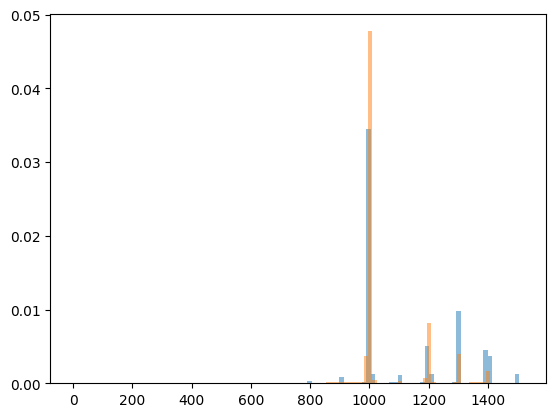

rougher.state.floatbank10_a_level


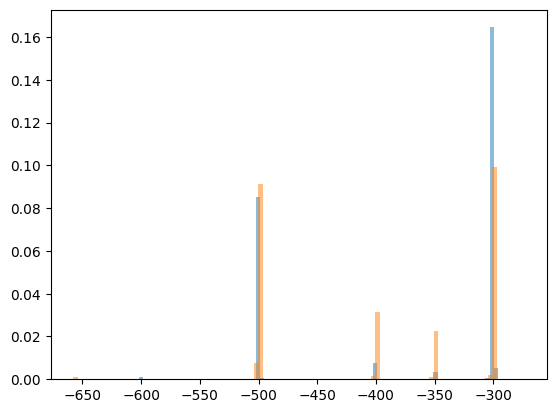

rougher.state.floatbank10_b_air


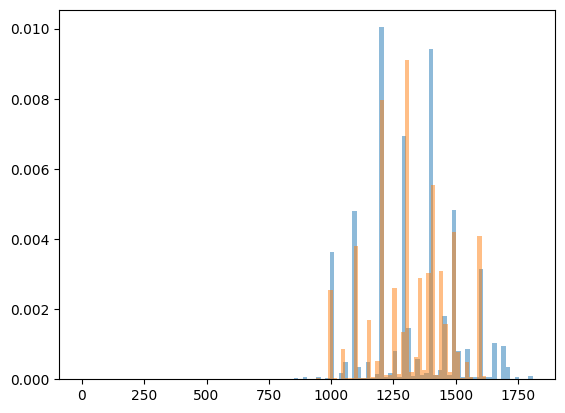

rougher.state.floatbank10_b_level


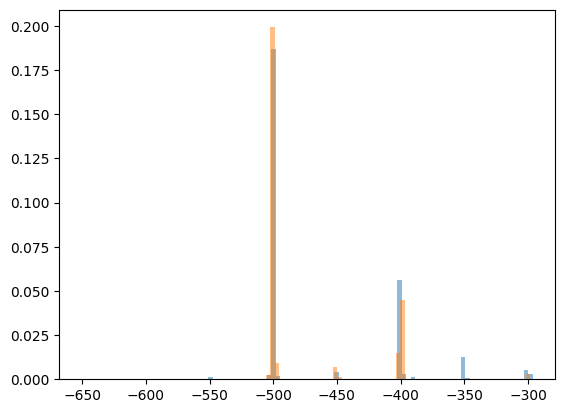

rougher.state.floatbank10_c_air


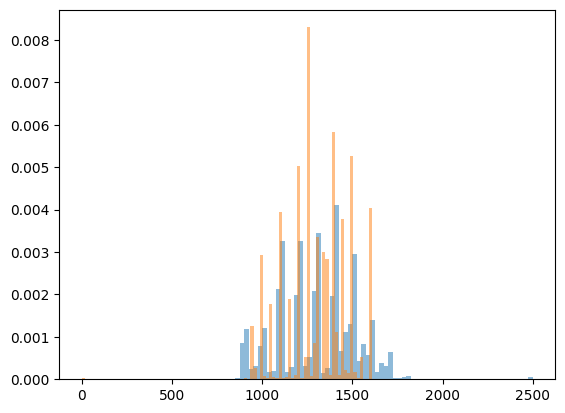

rougher.state.floatbank10_c_level


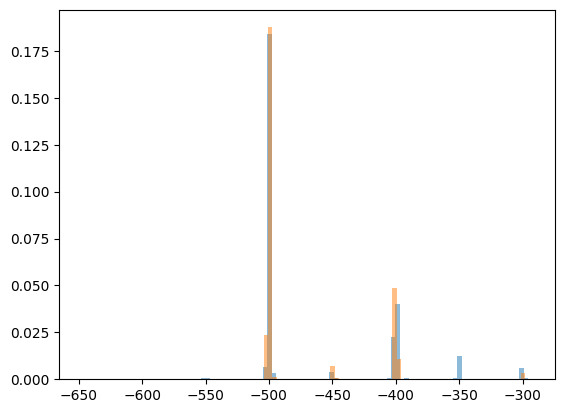

rougher.state.floatbank10_d_air


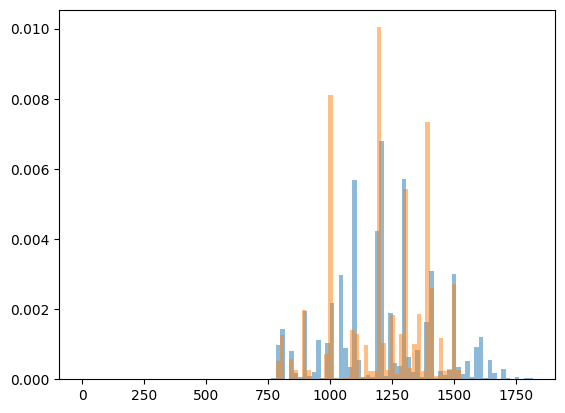

rougher.state.floatbank10_d_level


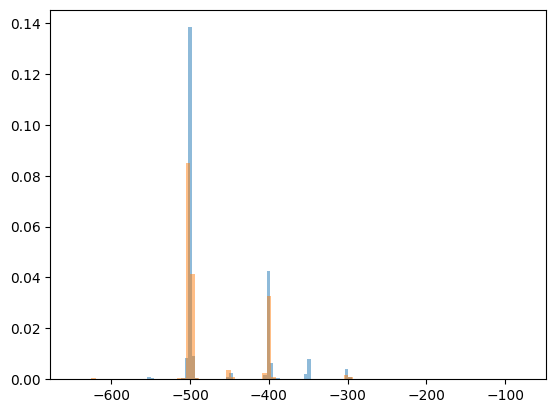

rougher.state.floatbank10_e_air


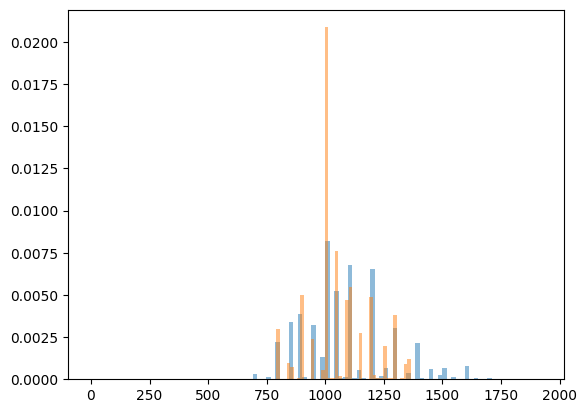

rougher.state.floatbank10_e_level


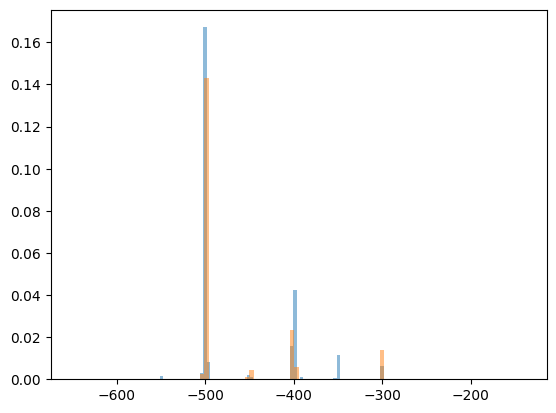

rougher.state.floatbank10_f_air


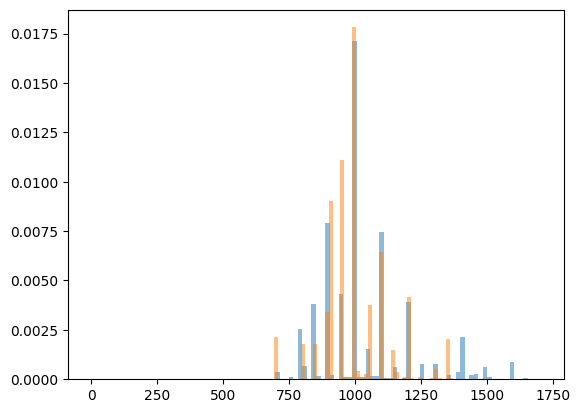

rougher.state.floatbank10_f_level


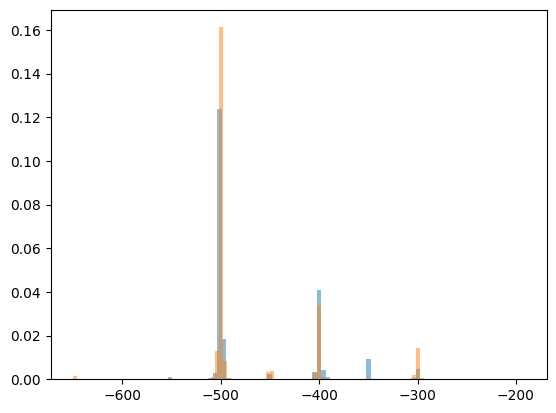

secondary_cleaner.output.tail_ag


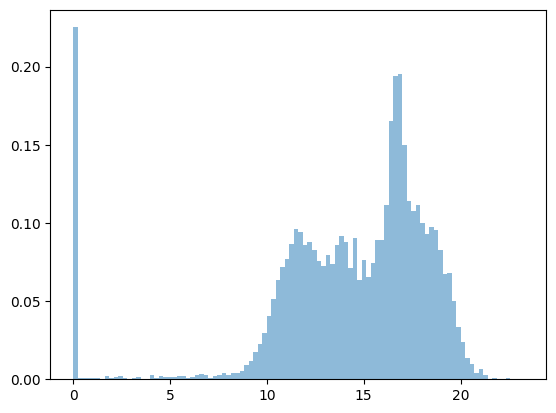

secondary_cleaner.output.tail_pb


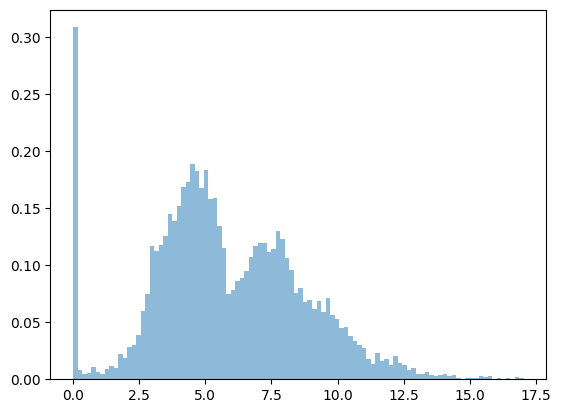

secondary_cleaner.output.tail_sol


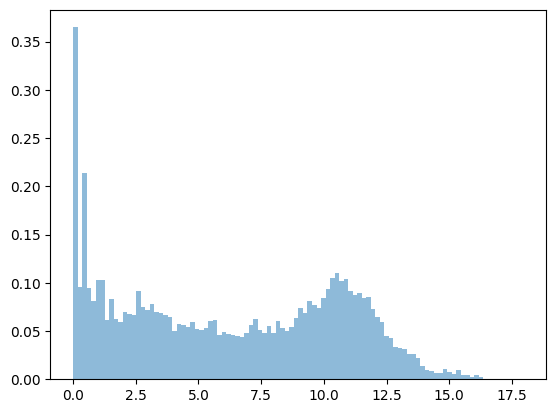

secondary_cleaner.output.tail_au


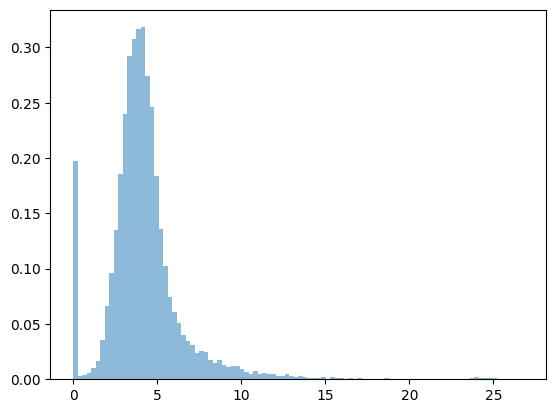

secondary_cleaner.state.floatbank2_a_air


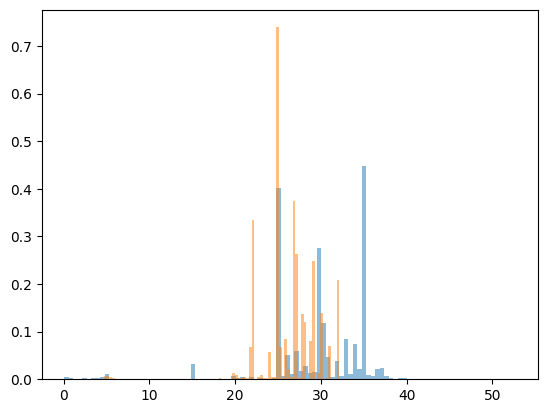

secondary_cleaner.state.floatbank2_a_level


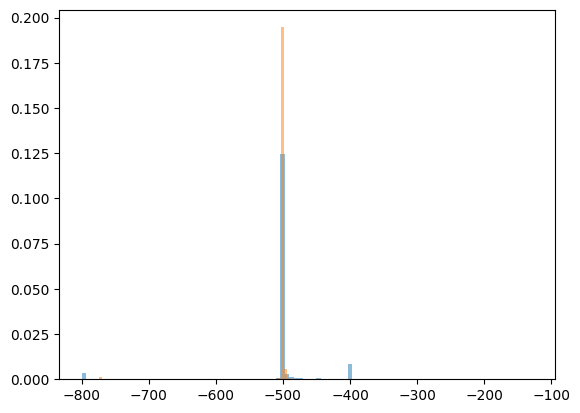

secondary_cleaner.state.floatbank2_b_air


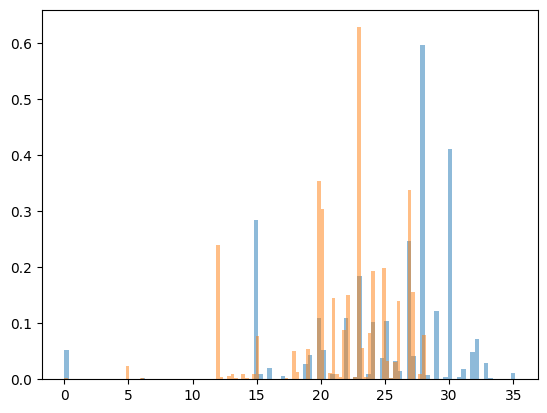

secondary_cleaner.state.floatbank2_b_level


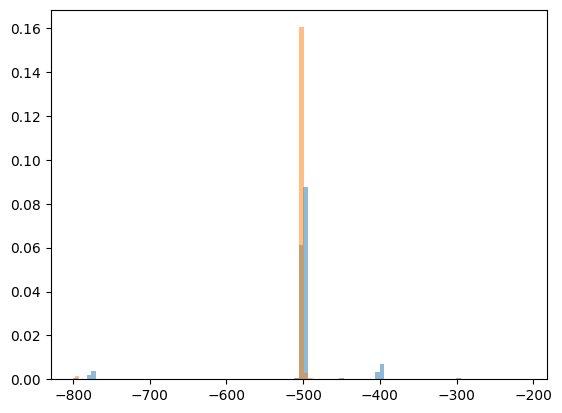

secondary_cleaner.state.floatbank3_a_air


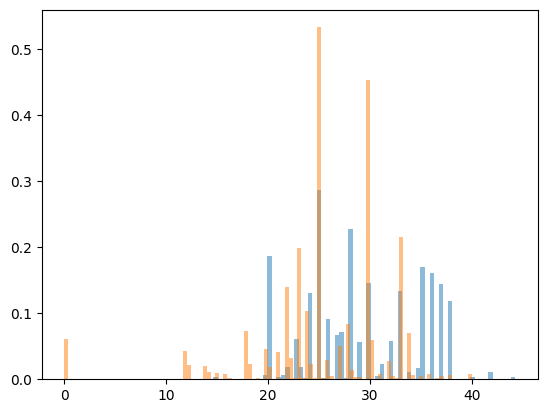

secondary_cleaner.state.floatbank3_a_level


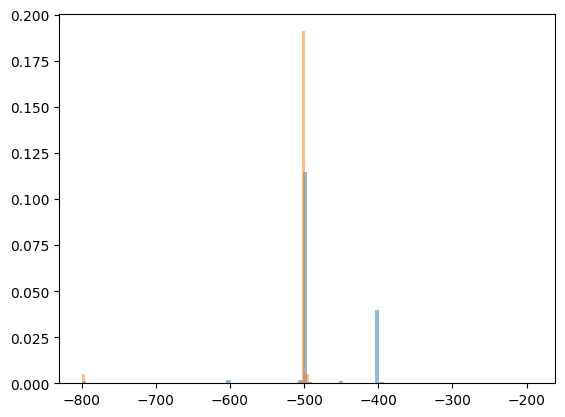

secondary_cleaner.state.floatbank3_b_air


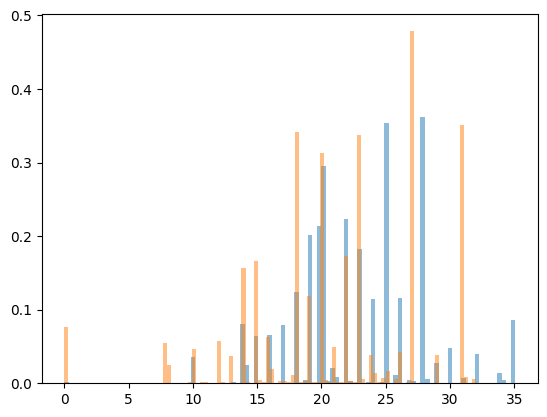

secondary_cleaner.state.floatbank3_b_level


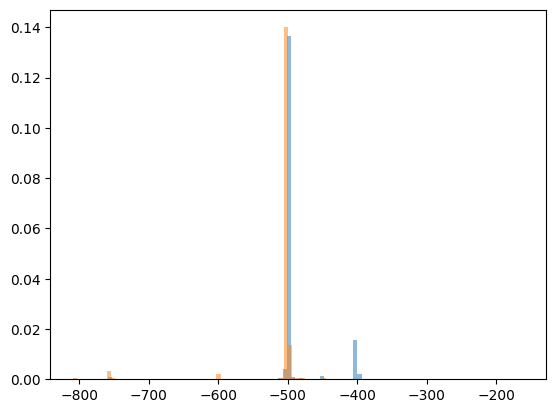

secondary_cleaner.state.floatbank4_a_air


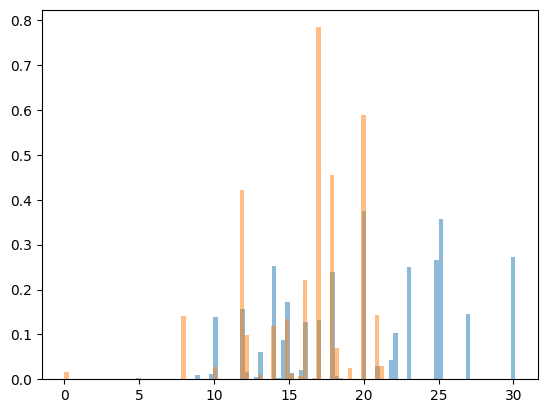

secondary_cleaner.state.floatbank4_a_level


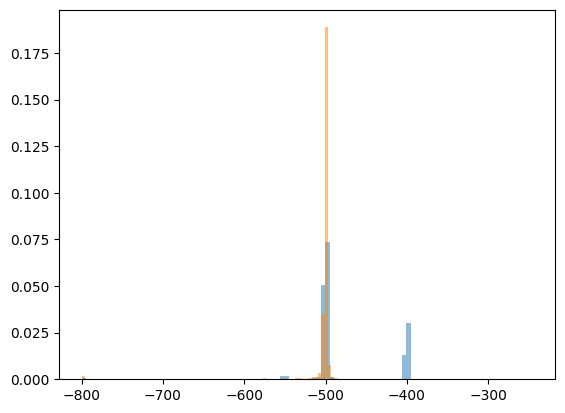

secondary_cleaner.state.floatbank4_b_air


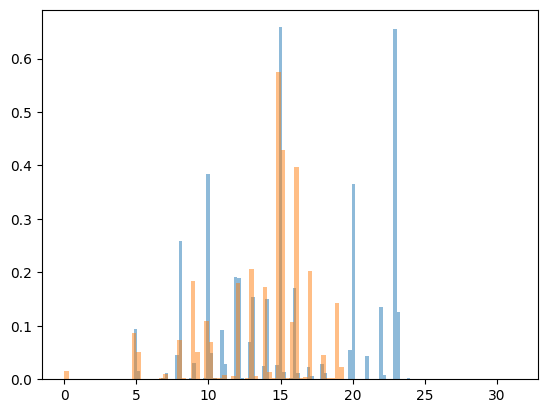

secondary_cleaner.state.floatbank4_b_level


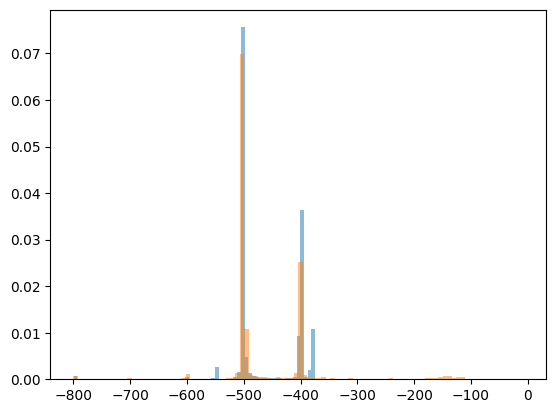

secondary_cleaner.state.floatbank5_a_air


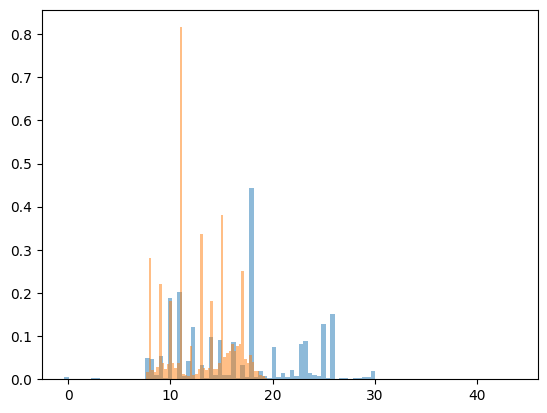

secondary_cleaner.state.floatbank5_a_level


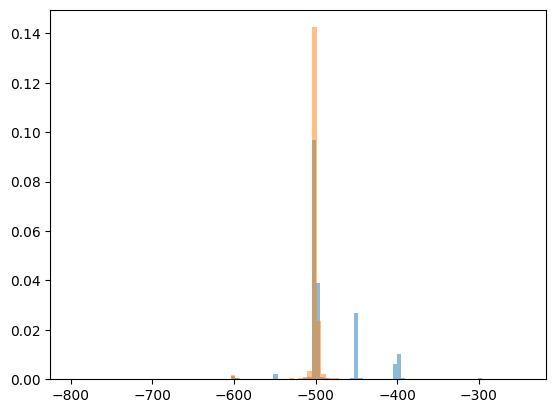

secondary_cleaner.state.floatbank5_b_air


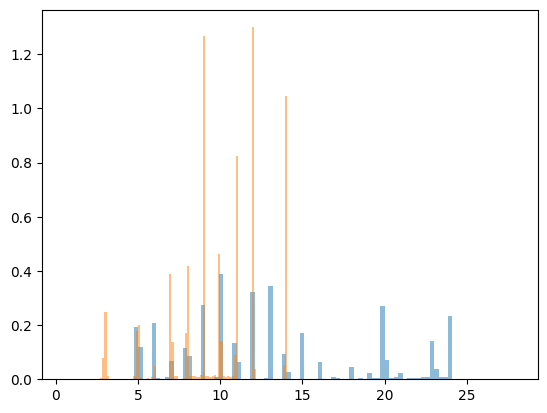

secondary_cleaner.state.floatbank5_b_level


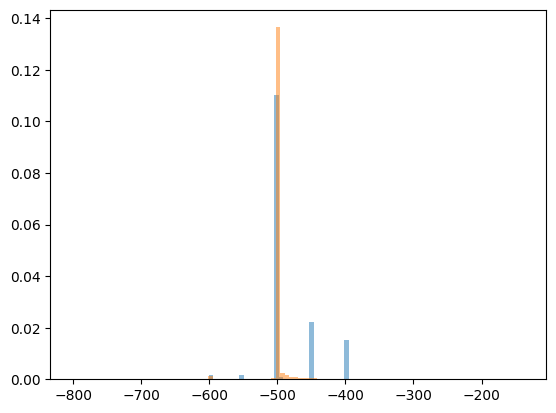

secondary_cleaner.state.floatbank6_a_air


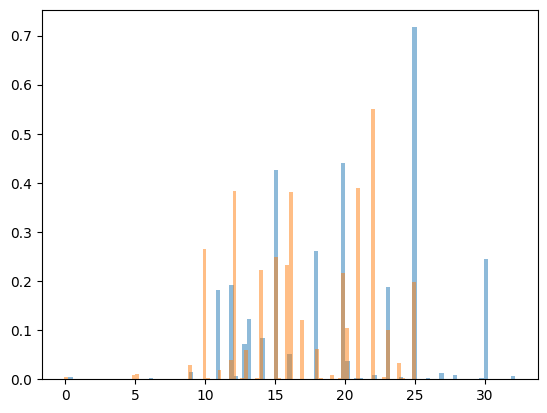

secondary_cleaner.state.floatbank6_a_level


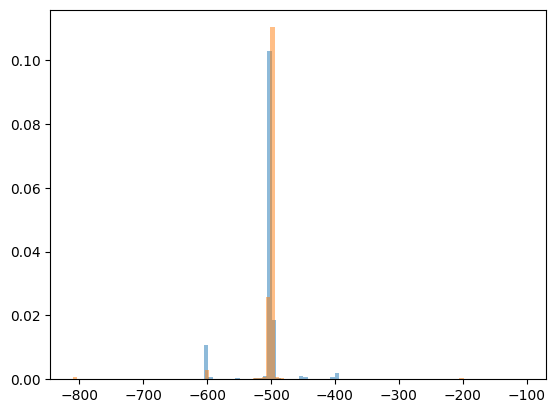

rougher.output.recovery_calc


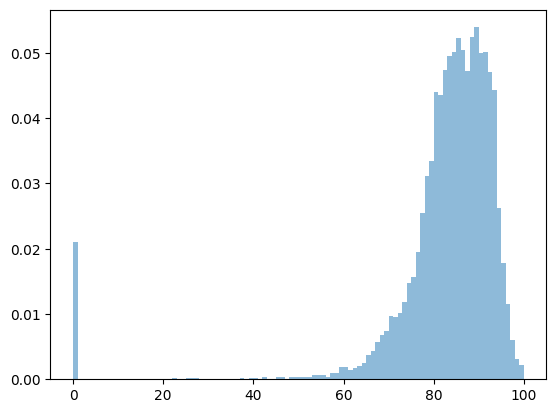

In [12]:
bins = 100
for i in train.columns:
    print(i)
    plt.hist(train[i], bins=bins, alpha=0.5, density=True)
    if i in test.columns:
        plt.hist(test[i], bins=bins, alpha=0.5, density=True)
    plt.show()

Основные выводы и расхождения:  
- для тестовой выборки взяли выбранные даты  
- в тестовой выборке распределения параметров не полностью повторяют распределение в обучающей выборке; как минимум, все данные кроме дат необходимо нормализовать перед обучением модели

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Выборки разного размера - гистограммы необходимо нормализовать.</font>  
<font color='purple'><b>Комментарий студента: добавил `density=True`; в основном стало лучше видно, что в целом данные похожи, но есть и выбросы</b></font>

<a id='step2'></a>
## Шаг 2. Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [13]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [14]:
metals = ['au', 'ag', 'pb']
prefix_states = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
axis_states = ['в исходном сырье', 'после флотации', 'после первичной очистки', 'в финальном концентрате']

AU


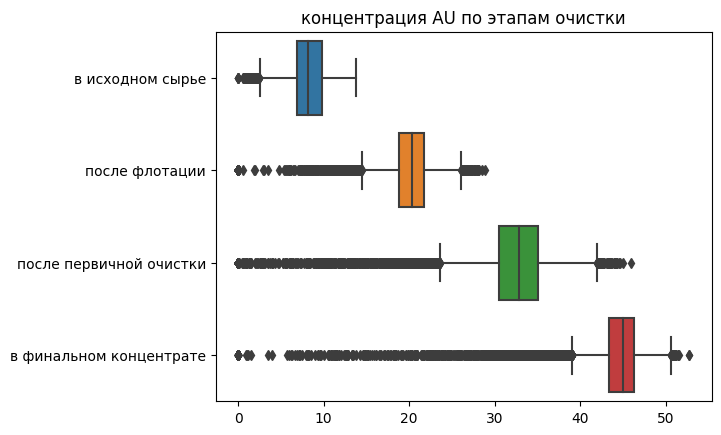

AG


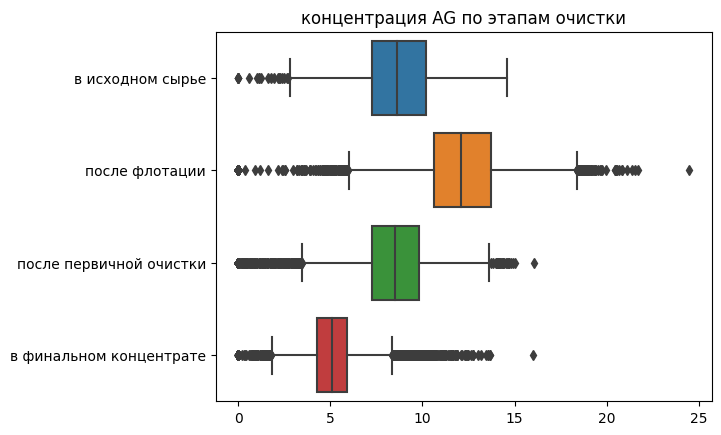

PB


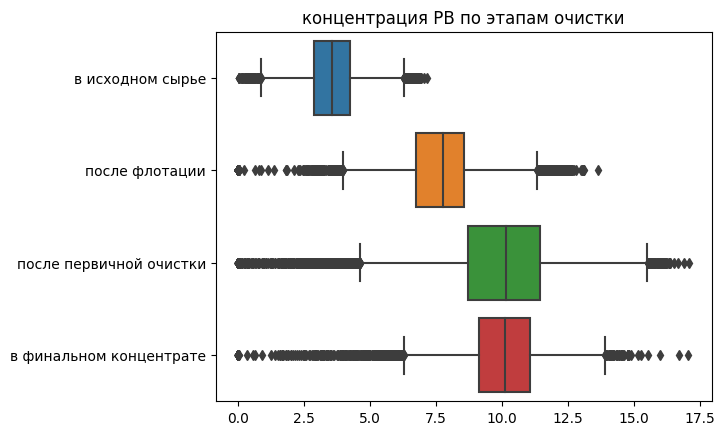

In [15]:
for metal in metals:
    p = []
    for i in range(len(prefix_states)):
        p.append(prefix_states[i] + metal)
    print(metal.upper())
    fig, ax = plt.subplots()
    _ = sns.boxplot(data=full[p], orient='h')
    ax.set_yticklabels(axis_states)
    plt.title(label=f'концентрация {metal.upper()} по этапам очистки')
    plt.show()

Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

In [16]:
train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [17]:
test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot: >

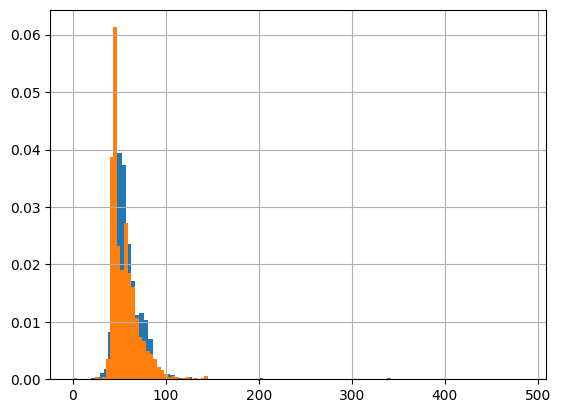

In [18]:
train['rougher.input.feed_size'].hist(bins=100, density=True)
test['rougher.input.feed_size'].hist(bins=100, density=True)

распределение размера гранул не являются одинаковыми на обучающей и тестовой выборках, но нормализации должно быть достаточно для обеспечения качественных предсказаний

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.</font>  
<font color='purple'><b>Комментарий студента: да, добавил `density=True` и стало еще лучше видно</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [19]:
rougher_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_au = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
final_au = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

full['rougher_feed'] = full[rougher_feed].sum(axis=1)
full['rougher_au'] = full[rougher_au].sum(axis=1)
full['final_au'] = full[final_au].sum(axis=1)

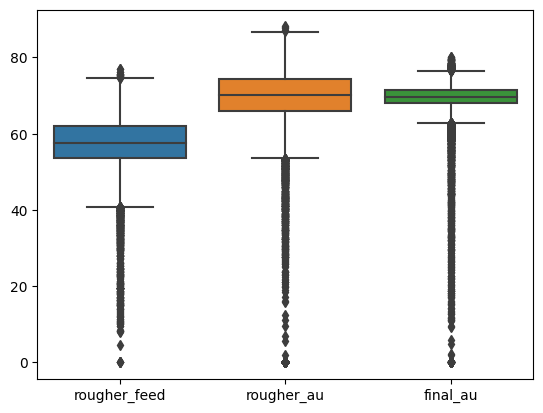

In [20]:
_ = sns.boxplot(data=full[['rougher_feed', 'rougher_au', 'final_au']])

после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Обрати внимание на нулевые и около нулевые значения концентраций. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из **обучающих** данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</font>  
<font color='purple'><b>Комментарий студента: дополнено - ниже</b></font>

Обратим внимание на выбросы суммарных значений концентраций, близких к нулю. Допустим, они вызваны неисправностью измерительного оборудования и удалим это выбросы из обучающей выборки.  
~~Заметим, что в тестовой выборке, на которой в итоге будем проверять модель, имеются только поля `rougher.input.feed_*`; их и необходимо проверить в обучающей выборке~~  
проверим концентрации на всех шагах

In [21]:
for x in train.columns:
    print(f"'{x}',", end=' ')

'date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'prim

In [22]:
concentrates = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
                'final.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 
                'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 
                'primary_cleaner.output.concentrate_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 
                'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']

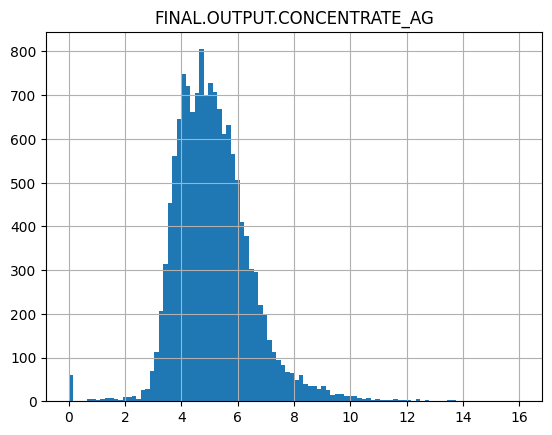

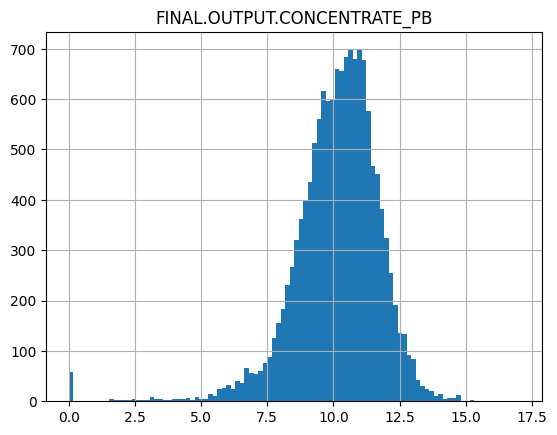

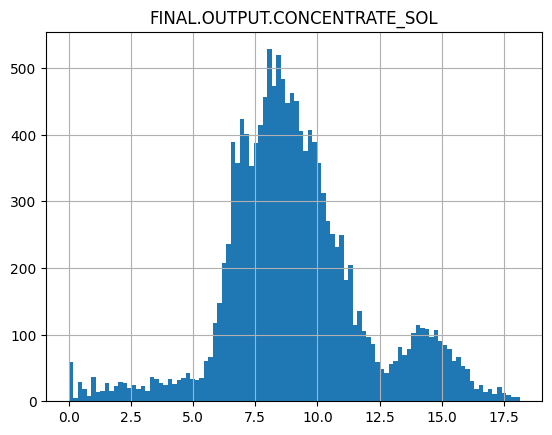

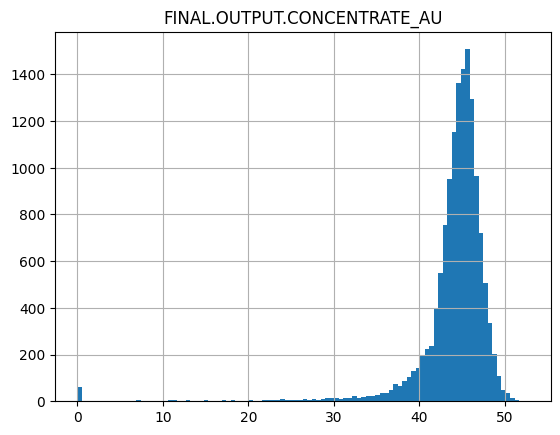

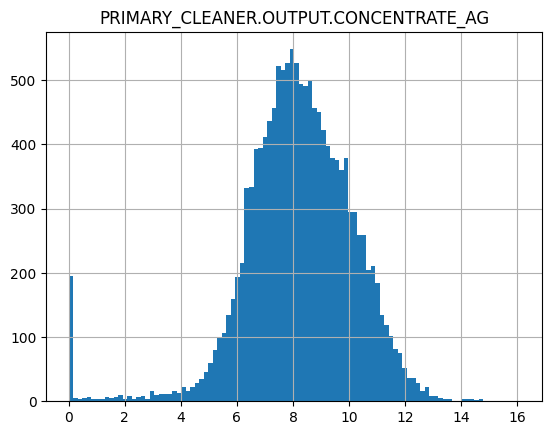

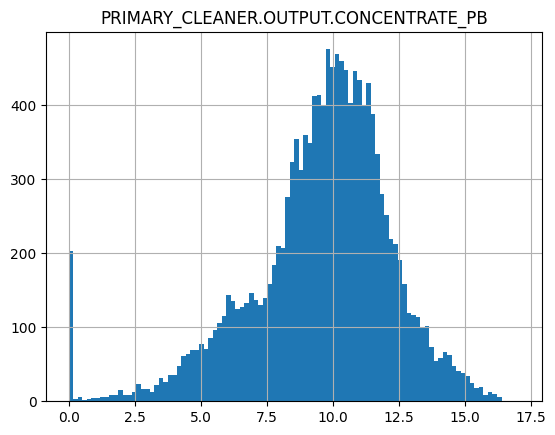

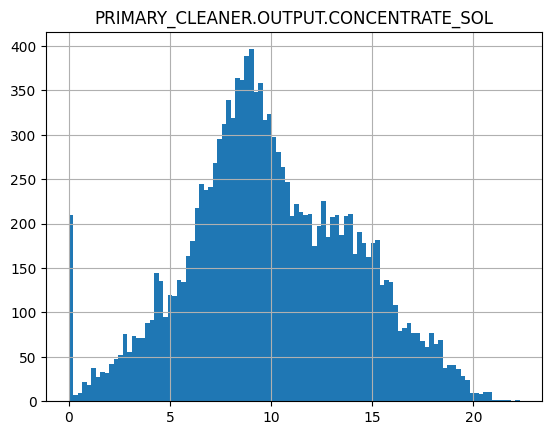

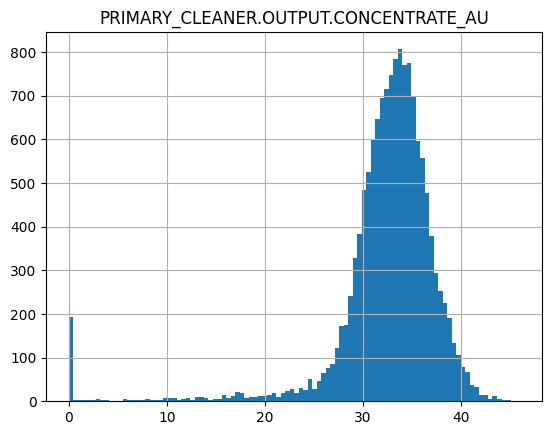

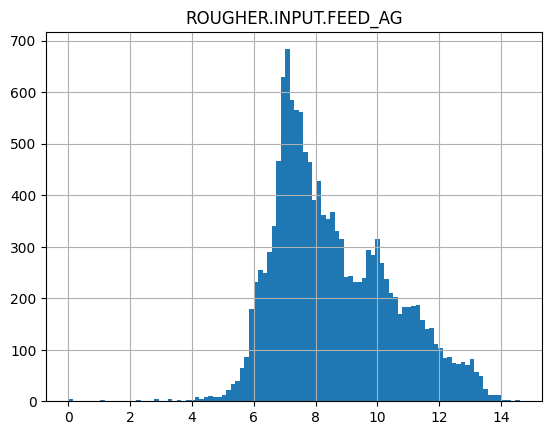

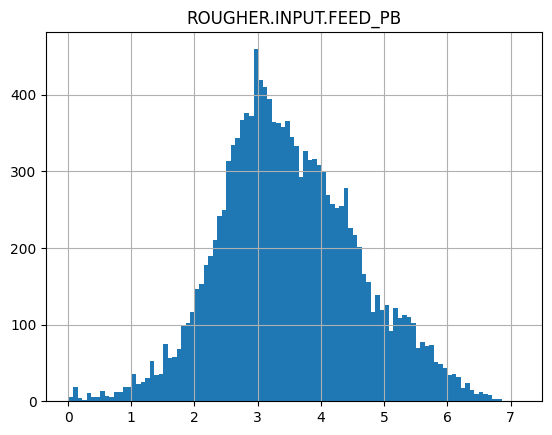

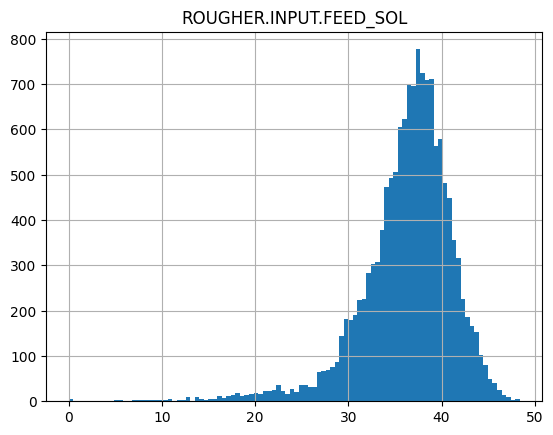

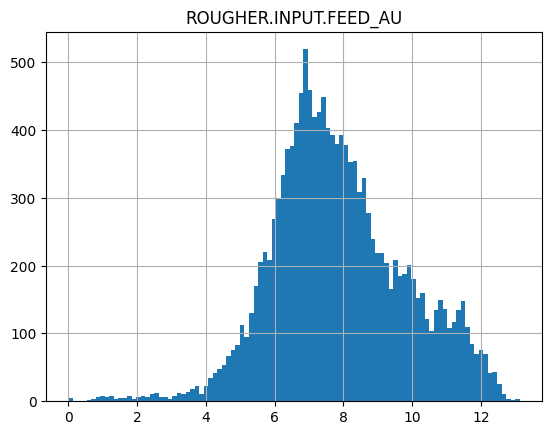

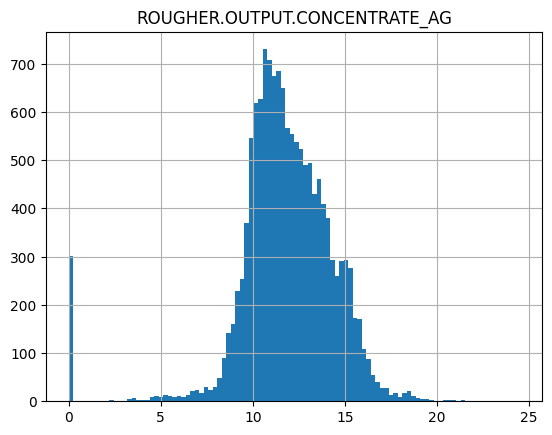

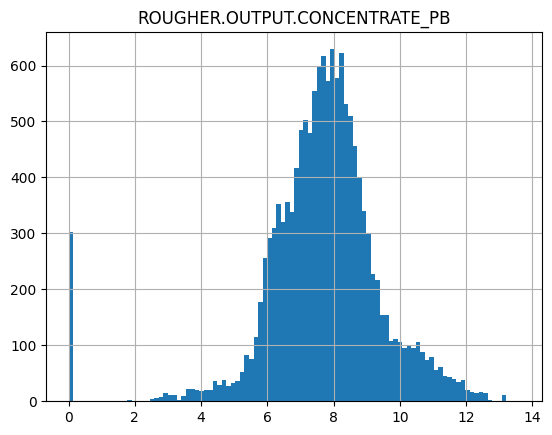

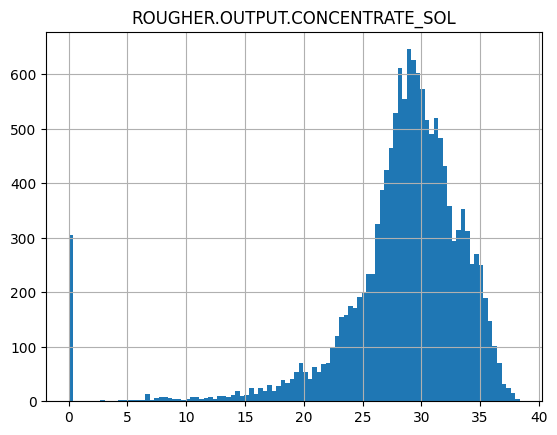

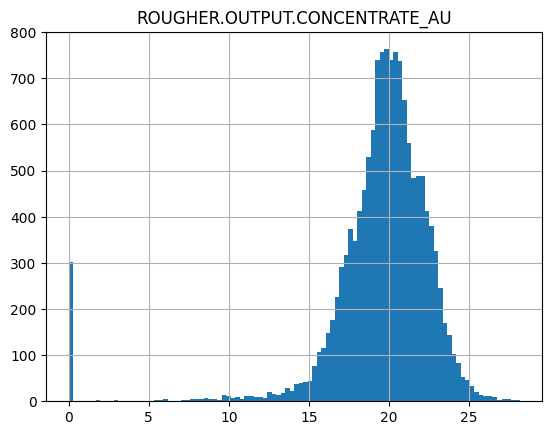

In [23]:
for item in concentrates:
    plt.title(label=item.upper())
    train[item].hist(bins=100)
    plt.show()

Будем считать аномальными следующие значения:  
- `rougher.input.feed_ag` : < 1
- `rougher.input.feed_pb` : никаких
- `rougher.input.feed_sol` < 2.5
- `rougher.input.feed_au` : < 0.5  
- `final.output.concentrate_ag` : < 0.5
- `final.output.concentrate_pb` : < 1.0
- `final.output.concentrate_sol` : < 0.1
- `final.output.concentrate_au` : < 10.0
- `primary_cleaner.output.concentrate_ag` : < 0.1
- `primary_cleaner.output.concentrate_pb` : < 0.1
- `primary_cleaner.output.concentrate_sol` : < 0.1
- `primary_cleaner.output.concentrate_au` : < 5.0
- `rougher.output.concentrate_ag` : < 2.0
- `rougher.output.concentrate_pb` : < 2.0
- `rougher.output.concentrate_sol` : < 2.0
- `rougher.output.concentrate_au` : < 2.0

уберем из обучающей выборки такие аномальные значения

In [24]:
train = train[
    (train['rougher.input.feed_ag'] > 1.0) & 
    (train['rougher.input.feed_sol'] > 2.5) & 
    (train['rougher.input.feed_au'] > 0.5) &
    (train['final.output.concentrate_ag'] > 0.5) & 
    (train['final.output.concentrate_pb'] > 1.0) & 
    (train['final.output.concentrate_sol'] > 0.1) & 
    (train['final.output.concentrate_au'] > 10.0) &
    (train['primary_cleaner.output.concentrate_ag'] > 0.1) & 
    (train['primary_cleaner.output.concentrate_pb'] > 0.1) & 
    (train['primary_cleaner.output.concentrate_sol'] > 0.1) & 
    (train['primary_cleaner.output.concentrate_au'] > 5.0) &
    (train['rougher.output.concentrate_ag'] > 2.0) & 
    (train['rougher.output.concentrate_pb'] > 2.0) & 
    (train['rougher.output.concentrate_sol'] > 2.0) & 
    (train['rougher.output.concentrate_au'] > 2.0)
    ]

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'> Нулевые значения суммарных концентраций есть и на других стадиях.\
Здесь нам понадобятся либо полные данные из train, Или нужно фильтровать full и чистить train с привязкой к дате наблюдения.</font>  
<font color='purple'><b>Комментарий студента: Дополнено выше, удаление из train "лишних" колонок перенесено ниже</b></font>

In [25]:
# уберем из train поля, которых нет в test (кроме целевых переменных)
target_columns = ['rougher.output.recovery', 'final.output.recovery']
target_date_columns = ['rougher.output.recovery', 'final.output.recovery', 'date']
diff = set(diff)
diff = list(diff - set(target_columns))

train.drop(diff, axis='columns', inplace=True)

train.info()

train.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        13542 non-null  datetime64[ns]
 1   final.output.recovery                       13542 non-null  float64       
 2   primary_cleaner.input.sulfate               13542 non-null  float64       
 3   primary_cleaner.input.depressant            13542 non-null  float64       
 4   primary_cleaner.input.feed_size             13542 non-null  float64       
 5   primary_cleaner.input.xanthate              13542 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      13542 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    13542 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      13542 non-null  float64       
 9   primar

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1948,2016-04-21 19:00:00,67.633784,83.657395,14.029215,7.230000,1.291570,1498.148465,-501.136830,1499.800496,-502.511656,...,14.013954,-500.728204,12.030556,-502.433010,13.018678,-503.422352,10.973664,-499.913237,20.001118,-503.735502
7450,2017-05-11 03:59:59,57.129933,60.012058,6.033212,5.850000,0.900030,1759.951740,-500.121952,1754.068773,-499.948846,...,24.997593,-399.486928,23.003180,-402.265891,26.011219,-450.946585,24.007910,-449.635707,29.990800,-499.477719
4096,2016-08-05 13:59:59,53.773510,54.986202,3.988830,7.700000,0.401837,1598.423151,-499.010897,1602.002916,-498.554288,...,20.056015,-397.658481,9.995576,-399.145084,8.941866,-396.938184,5.010315,-400.027613,23.013342,-498.138163
12550,2018-05-29 16:59:59,64.216906,104.796174,7.978950,7.096665,1.025153,1649.969504,-500.638736,1651.064263,-499.965775,...,30.037566,-500.174014,20.042043,-500.319563,21.003156,-500.436088,15.859491,-499.508982,19.999944,-500.050612
6914,2017-04-17 15:59:59,68.401483,146.393949,7.021376,8.400000,0.446044,1740.474168,-499.871159,1750.562701,-499.644457,...,24.973527,-401.897943,23.029677,-399.669285,25.977442,-450.544919,23.963222,-449.805383,30.006436,-499.992448
9688,2017-08-28 14:59:59,64.576084,175.169839,7.003970,7.260000,0.618900,1351.852191,-500.577729,1352.556084,-499.983897,...,14.511050,-498.366694,10.904123,-399.810836,13.995356,-496.701854,10.996190,-500.111327,15.012783,-499.392327
6125,2017-03-11 11:59:59,68.051841,59.994236,2.970378,6.935000,0.288659,1701.179749,-499.738728,1699.020020,-499.260280,...,24.998697,-401.277842,22.891619,-400.144289,19.468101,-451.079630,20.014074,-450.222353,25.006018,-499.992909
14120,2018-08-17 06:59:59,70.124520,105.008309,6.995182,6.401667,0.801839,1648.001550,-399.870802,1648.478146,-400.203233,...,23.001575,-500.731390,19.995845,-499.827275,18.021047,-499.853567,12.971879,-500.117227,19.998784,-500.926436
13452,2018-07-10 09:59:59,82.849627,162.084229,5.880100,7.450000,1.000424,1449.613729,-499.118330,1446.516572,-499.923164,...,25.018551,-500.213902,19.968675,-500.076335,18.012895,-499.932304,13.002845,-499.679965,12.966799,-499.710504
13062,2018-06-20 22:59:59,72.375211,125.856370,6.094312,7.210000,1.105067,1599.004765,-499.531549,1598.567767,-499.906458,...,27.002891,-499.546078,19.966577,-499.920517,17.964896,-499.107412,13.988900,-499.898812,14.022703,-498.749693


<a id='step3'></a>
## Шаг 3. Построение модели

In [26]:
test.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Лучше использовать `ffill`, при работе будут заполнять пердыдущим значением, а не будущим.</font>  
<font color='purple'><b>Комментарий студента: поправлено</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

функции для вычисления итоговой sMAPE

In [27]:
#def sMAPE(y_true, y_pred):
#    y_true = list(y_true)
#    y_pred = list(y_pred)
#    sum_ = 0.0
#    n = len(y_true)
#    for i in range(n):
#        nom = abs(y_true[i] - y_pred[i])
#        den = abs(y_true[i]) + abs(y_pred[i])
#        dt = nom / den
#        sum_ += 2.0 * dt
#    return 100.0 * sum_ / n

def sMAPE(y_true, y_pred):
    return 200.0 * np.mean (np.abs(y_true-y_pred) / (np.abs(y_true) + np.abs(y_pred)))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `sMAPE` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Цикл сильно тормозит вычисления. Для суммы в Pyhton есть отличные методы!</font>  
<font color='purple'><b>Комментарий студента: переписал функцию, старый код закомментировал</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! 👍</font>

In [28]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [29]:
def sMAPEtotal_(sMAPErougher, sMAPEfinal):
    return 0.25 * sMAPErougher + 0.75 * sMAPEfinal

def sMAPEtotal(rougher_true, rougher_pred, final_true, final_pred):
    return sMAPEtotal_(sMAPE(rougher_true, rougher_pred), sMAPE(final_true, final_pred))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [30]:
features = train.drop(columns=target_date_columns)
target = train[target_columns]

In [31]:
features_test = pd.merge(test, full[target_date_columns], on='date')
target_test = features_test[target_columns]
features_test.drop(columns=target_date_columns, inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, при пересечении таблиц лучше привязаться ко времени.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Круто! Pipeline позволяет избежать утечек информации через предобработку даже при кроссвалидации.</font>

In [32]:
def estimate_model(model, param_grid):
    global sMAPE_scorer
    global features
    global target_columns
    global target
    # подбираем rougher
    search0 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[0]])
    # подбираем final
    search1 = GridSearchCV(model, param_grid, cv=CROSS_VALS, n_jobs=-1, scoring=sMAPE_scorer, error_score='raise', verbose=10).fit(features, target[target_columns[1]])
    print(f'лучшие метрики:\t{search0.best_score_:.2f} | {search1.best_score_:.2f}')
    return search0.best_estimator_, search1.best_estimator_

In [33]:
model = Pipeline([
    ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
])
param_grid = {
    'poly__degree': [2]
}
lr_rougher, lr_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START poly__degree=2..............................................
[CV 2/3; 1/1] START poly__degree=2..............................................
[CV 3/3; 1/1] START poly__degree=2..............................................
[CV 2/3; 1/1] END .............poly__degree=2;, score=-45.065 total time=   7.8s
[CV 3/3; 1/1] END .............poly__degree=2;, score=-18.843 total time=   7.9s
[CV 1/3; 1/1] END .............poly__degree=2;, score=-37.129 total time=   7.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START poly__degree=2..............................................
[CV 2/3; 1/1] START poly__degree=2..............................................
[CV 3/3; 1/1] START poly__degree=2..............................................
[CV 1/3; 1/1] END .............poly__degree=2;, score=-79.515 total time=   7.1s
[CV 2/3; 1/1] END .............poly__degree=2;, score=-87.837 total time

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Полиномы здесь плохо работают, поробуй без них.</font>  
<font color='purple'><b>Комментарий студента: исправлено</b></font>

In [34]:
model = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
])
param_grid = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': [1.0, 0.1],
    'svr__C': [1, 10]
}
svr_rougher, svr_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 3/3; 1/8] START svr__C=1, svr__gamma=1.0, svr__kernel=linear................
[CV 1/3; 2/8] START svr__C=1, svr__gamma=1.0, svr__kernel=rbf...................
[CV 2/3; 2/8] START svr__C=1, svr__gamma=1.0, svr__kernel=rbf...................
[CV 3/3; 2/8] START svr__C=1, svr__gamma=1.0, svr__kernel=rbf...................
[CV 1/3; 3/8] START svr__C=1, svr__gamma=0.1, svr__kernel=linear................
[CV 2/3; 3/8] START svr__C=1, svr__gamma=0.1, svr__kernel=linear................
[CV 1/3; 1/8] START svr__C=1, svr__gamma=1.0, svr__kernel=linear................
[CV 2/3; 1/8] START svr__C=1, svr__gamma=1.0, svr__kernel=linear................
[CV 2/3; 2/8] END svr__C=1, svr__gamma=1.0, svr__kernel=rbf;, score=-5.292 total time=  34.2s
[CV 3/3; 3/8] START svr__C=1, svr__gamma=0.1, svr__kernel=linear................
[CV 1/3; 2/8] END svr__C=1, svr__gamma=1.0, svr__kernel=rbf;, score=-11.564 total time=  34.5s
[CV 1/3; 4/8] START sv

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Деревьям и Полиномы и Стандартизация только усложняют вычисления.</font>  
<font color='purple'><b>Комментарий студента: убрано</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [35]:
model = Pipeline([
                ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])
param_grid = {
    'forest__n_estimators': [50, 100, 150],
    'forest__max_depth': [10, 15]
}
forest_rougher, forest_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START forest__max_depth=10, forest__n_estimators=50...............[CV 3/3; 1/6] START forest__max_depth=10, forest__n_estimators=50...............

[CV 2/3; 2/6] START forest__max_depth=10, forest__n_estimators=100..............
[CV 2/3; 1/6] START forest__max_depth=10, forest__n_estimators=50...............
[CV 1/3; 2/6] START forest__max_depth=10, forest__n_estimators=100..............
[CV 2/3; 3/6] START forest__max_depth=10, forest__n_estimators=150..............
[CV 1/3; 3/6] START forest__max_depth=10, forest__n_estimators=150..............
[CV 3/3; 2/6] START forest__max_depth=10, forest__n_estimators=100..............
[CV 2/3; 1/6] END forest__max_depth=10, forest__n_estimators=50;, score=-7.014 total time=  28.7s
[CV 3/3; 3/6] START forest__max_depth=10, forest__n_estimators=150..............
[CV 3/3; 1/6] END forest__max_depth=10, forest__n_estimators=50;, score=-9.163 total time=  28.9s
[CV 1/3; 4/6] S

In [36]:
model = Pipeline([
        ('scaler', StandardScaler()),
                ('neighbors', KNeighborsRegressor())
                ])
param_grid = {
    'neighbors__n_neighbors': [3, 5, 7, 9],
    'neighbors__weights': ['uniform', 'distance'],
    'neighbors__algorithm' : ['brute', 'kd_tree']
}
kn_rougher, kn_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=uniform
[CV 2/3; 1/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=uniform
[CV 3/3; 1/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=uniform
[CV 1/3; 2/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=distance
[CV 2/3; 2/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=distance
[CV 3/3; 2/16] START neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=distance
[CV 1/3; 3/16] START neighbors__algorithm=brute, neighbors__n_neighbors=5, neighbors__weights=uniform
[CV 2/3; 3/16] START neighbors__algorithm=brute, neighbors__n_neighbors=5, neighbors__weights=uniform
[CV 1/3; 1/16] END neighbors__algorithm=brute, neighbors__n_neighbors=3, neighbors__weights=uniform;, score=-9.601 total

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Здесь нужен Скалер.</font>
<font color='purple'><b>Комментарий студента: добавлено</b></font>

In [37]:
model = Pipeline([
        ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures()),
                ('lasso', Lasso(random_state=RANDOM_STATE))
                ])
param_grid = {
    'poly__degree': [2],
    'lasso__alpha': [1, 2, 4, 8, 16]
}
lasso_rougher, lasso_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START lasso__alpha=1, poly__degree=2..............................
[CV 2/3; 1/5] START lasso__alpha=1, poly__degree=2..............................
[CV 3/3; 1/5] START lasso__alpha=1, poly__degree=2..............................
[CV 1/3; 2/5] START lasso__alpha=2, poly__degree=2..............................
[CV 2/3; 2/5] START lasso__alpha=2, poly__degree=2..............................
[CV 3/3; 2/5] START lasso__alpha=2, poly__degree=2..............................
[CV 1/3; 3/5] START lasso__alpha=4, poly__degree=2..............................
[CV 2/3; 3/5] START lasso__alpha=4, poly__degree=2..............................
[CV 2/3; 3/5] END lasso__alpha=4, poly__degree=2;, score=-5.357 total time=   2.4s
[CV 1/3; 3/5] END lasso__alpha=4, poly__degree=2;, score=-11.034 total time=   2.4s
[CV 3/3; 3/5] START lasso__alpha=4, poly__degree=2..............................
[CV 1/3; 4/5] START lasso__alpha=8, poly__de

<font color='purple'><b>Комментарий студента: убрал Ridge: работает долго, результат показывает хуже остальных моделей</b></font>

In [38]:
# model = Pipeline([
#         ('scaler', StandardScaler()),
#             ('poly', PolynomialFeatures()),
#                 ('ridge', Ridge(random_state=RANDOM_STATE))
#                 ])
# param_grid = {
#     'poly__degree': [2],
#     'ridge__alpha': [1, 2, 4],
#     'ridge__solver': ['svd', 'cholesky', 'sparse_cg', 'sag']
# }
# ridge_rougher, ridge_final = estimate_model(model, param_grid)

результаты моделирования на обучающей выборке (кросс-валидация):  
|модель|rougher|final|
|-|-|-|
|LinearRegression|-33.68 | -68.09|
|SVR|-8.31 | -10.68|
|RandomForestRegressor|-8.00 | -10.07|  
|KNeighborsRegressor|-9.29 | -12.18|  
|Lasso|-8.70 | -10.37|  
|~~Ridge~~|~~-12.27~~|~~-28.33~~|  

проверим на тестовой выборке 2 модели:
- RandomForestRegressor
- SVR для предсказания rougher.output и Lasso для final.output (лес имеет тенденция к переобучению)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [39]:
def sMAPE_model(rougher_model, final_model):
    global features_test
    global target_test
    rougher_pred = rougher_model.predict(features_test)
    final_pred = final_model.predict(features_test)
    return sMAPEtotal(target_test['rougher.output.recovery'], rougher_pred, target_test['final.output.recovery'], final_pred)

In [40]:
sMAPE_model(svr_rougher, lasso_final)

9.089742849980777

In [41]:
sMAPE_model(forest_rougher, forest_final)

9.214608695151968

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

итоговая метрика на тестовой выборке составила 9.05%

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

Сравним работу наших выбранных моделей с работой наивной модели (DummyRegressor)

In [42]:
model = Pipeline([
                ('dummy', DummyRegressor())
                ])
param_grid = {
    'dummy__strategy': ['mean', 'median'],
}
dummy_rougher, dummy_final = estimate_model(model, param_grid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START dummy__strategy=mean........................................
[CV 2/3; 1/2] START dummy__strategy=mean........................................
[CV 3/3; 1/2] START dummy__strategy=mean........................................
[CV 1/3; 1/2] END .......dummy__strategy=mean;, score=-11.010 total time=   0.0s
[CV 1/3; 2/2] START dummy__strategy=median......................................
[CV 2/3; 1/2] END ........dummy__strategy=mean;, score=-5.162 total time=   0.0s
[CV 3/3; 1/2] END ........dummy__strategy=mean;, score=-9.915 total time=   0.0s
[CV 2/3; 2/2] START dummy__strategy=median......................................
[CV 1/3; 2/2] END .....dummy__strategy=median;, score=-11.662 total time=   0.0s
[CV 3/3; 2/2] START dummy__strategy=median......................................
[CV 2/3; 2/2] END ......dummy__strategy=median;, score=-5.349 total time=   0.0s
[CV 3/3; 2/2] END ......dummy__strategy=median;, s

In [43]:
sMAPE_model(dummy_rougher, dummy_final)

9.452246355624226

Результаты сравнения работы моделей:  
|модель|sMAPEtotal на тестовой выборке|
|-|-|
|Dummy|9.45%|
|RandomForest|9.21%|
|SVR+Lasso|9.09%|  

итогово выбираем комплексную модель SVR для rougher.output и Lasso для total.output

<a id='step4'></a>
## Шаг 4. Результаты и выводы

Были проанализированы данные по очистке золотосодержащей руды.  
Произведена проверка расчета концентрации золоты в исходных данных - успешно.  
Проанализирована предоставленная тестовая выборка. В ней отсутствуют почти все данные о выходе и хвостах на всех этапах процесса очистки (кроме выхода из вторичной очистки, которая есть). Также отсутствуют некоторые расчетные данные: `rougher.calculation.au_pb_ratio`, `rougher.calculation.floatbank10_sulfate_to_au_feed`, `rougher.calculation.floatbank11_sulfate_to_au_feed`, `rougher.calculation.sulfate_to_au_concentrate`  

Проведен анализ концентрации металлов по этапам очистки:
- Концентрация золота в ходе процесса очистки стабильно растет, начиная с 10% до 50%  
- Концентрация серебра вырастает после флотации с 9% до 13%, затем падает до 5% после финального этапа очистки  
- Концентрпция свинца растет с 3% до 10% после первичной очистки и остается на этом уровне в финальном концентрате  

Проведен анализ суммарной концентрации всех веществ на разных стадиях:  
- после первичной очистки концентрация металлов в среднем повышается с 60% до 70%, при этом разброс значений достаточно велик  
- после финальной очистки концентрация в среднем уже не повышается, но значительно снижается разброс цифр  
  
Построены 3 модели отдельно для 2 целевых величин:
- `rougher.output.recovery`
- `final.output.recovery`  
Результаты метрик sMAPE на обучающей выборке (кросс-валидация):  

|модель|rougher|final|
|-|-|-|
|LinearRegression|-33.68 | -68.09|
|SVR|-8.31 | -10.68|
|RandomForestRegressor|-8.00 | -10.07|  
|KNeighborsRegressor|-9.29 | -12.18|  
|Lasso|-8.70 | -10.37|  
|Ridge|-12.27 | -28.33|  

Для проверки на тестовой выборке выбраны 2 модели:
- RandomForest, показавшая лучшие метрики на обучающей выборке
- составная модель: SVR для `rougher.output.recovery` и Lasso для `final.output.recovery`

Результаты итогового сравнения:  
|модель|sMAPEtotal на тестовой выборке|
|-|-|
|Dummy|9.45%|
|RandomForest|9.21%|
|SVR+Lasso|9.09%|  

Обе выбранные модели показали итоговую метрику лучше, чем наивная модель.

Итогово предпочтительна составная модель: (SVR для `rougher.output.recovery` и Lasso для `final.output.recovery`), показывающая итоговую метрику 9.09%.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Николай, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>  
<font color='purple'><b>Комментарий студента: Тебе спасибо, что рассматриваешь работу на праздниках!</b></font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>
<font color='purple'><b>Комментарий студента: это сделано</b></font>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>
<font color='purple'><b>Комментарий студента: тоже сделано. Наивная модель показывает высокую метрику, из-за чего пришлось добавить несколько моделей в рассмотрение и несколько переписать код, чтобы избежать повторов. Из-за этого немного изменилась структура, и теперь некоторые твои комментарии могут не попадать в контекст. Но я оставил их все.</b></font>

<font color='blue'>Что можно сделать лучше:</font>
<font color='darkorange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>  
<font color='purple'><b>Комментарий студента: кажется, учел все</b></font>  
<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Николай, большое спасибо за доработку. Убраны наблюдения с нулевой суммарной концентрацией на стадии подачи сырья, Появилась Наивная модель.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй доочистить данные.</font></ul>
<font color='purple'><b>Комментарий студента: сделано, на обучающей выборке стало лучше, но итогово лучше не стало</b></font>
<font color='blue'><b>Жду новую версию проекта :)</b></font>